# PROBLEM STATEMENT
* To identify customer segments and generate data-driven strategies for optimizing operations and marketing.
 

In [2]:
# importing neccessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# loading the data set
data=pd.read_excel("Data Set.xlsx")
data.head(5)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20
3,19392,24,Desktop,Meerut,Action Camera,11000.476305,8,2023-02-24 16:24:13,8
4,57501,60,Desktop,Faridabad,Microphone,2814.737205,5,2021-09-15 02:45:31,10


In [4]:
df=data.copy()
df.head(3)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1
2,19067,61,Desktop,Kolkata,Microphone,784.924822,2,2022-12-10 10:25:27,20


In [5]:
df.shape

(100000, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   CustomerID    100000 non-null  int64         
 1   Age           100000 non-null  int64         
 2   Device        100000 non-null  object        
 3   City          100000 non-null  object        
 4   Product       100000 non-null  object        
 5   Price         100000 non-null  float64       
 6   Quantity      100000 non-null  int64         
 7   PurchaseDate  100000 non-null  datetime64[ns]
 8   BrowsingTime  100000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 6.9+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,CustomerID,Age,Price,Quantity,PurchaseDate,BrowsingTime
count,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000
mean,49995.401950,44.056690,12499.116588,5.508530,2022-02-16 17:58:20.675149824,10.007630
min,3.000000,18.000000,100.157985,1.000000,2020-01-01 00:19:15,0.000000
25%,24926.500000,31.000000,1751.335410,3.000000,2021-01-21 10:27:48.249999872,5.000000
50%,50024.000000,44.000000,4516.202837,6.000000,2022-02-16 01:43:06,10.000000
75%,75072.000000,57.000000,11391.843495,8.000000,2023-03-12 15:43:33,15.000000
max,99999.000000,70.000000,199988.317638,10.000000,2024-04-10 10:23:28,20.000000
std,28889.584888,15.298008,22943.009995,2.872739,NaN,6.062808


In [9]:
# plotting the data set 

In [10]:
age_counts=df['Age'].value_counts()
age_counts

Age
41    1997
55    1991
33    1977
25    1959
69    1947
64    1934
23    1929
26    1923
67    1923
46    1921
32    1915
59    1914
43    1913
54    1913
35    1912
63    1910
56    1908
53    1906
50    1906
19    1906
66    1906
58    1903
31    1903
49    1897
38    1888
39    1883
47    1883
57    1881
60    1879
52    1876
30    1875
68    1875
70    1869
20    1866
21    1862
65    1861
61    1861
24    1856
44    1855
37    1854
40    1854
34    1850
51    1847
22    1845
28    1844
42    1844
36    1841
29    1838
62    1833
18    1831
27    1820
48    1819
45    1797
Name: count, dtype: int64

In [11]:
def segment_age(age):
    if age <= 25:
        return 'Young'
    elif age <=55:
        return 'Adult'
    else:
        return 'Senior'


In [12]:
df['Age_group']=df['Age'].apply(segment_age)
df.head(2)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Age_group
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.406091,2,2021-08-06 05:29:38,9,Adult
1,11891,26,Tablet,Vadodara,Camera,35274.014252,6,2022-11-25 01:54:51,1,Adult


In [13]:
df['Price']=df['Price'].round(2)
df.head(2)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Age_group
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.41,2,2021-08-06 05:29:38,9,Adult
1,11891,26,Tablet,Vadodara,Camera,35274.01,6,2022-11-25 01:54:51,1,Adult


In [14]:
# Purchase date
df['year']=df['PurchaseDate'].dt.year
df['month']=df['PurchaseDate'].dt.month
df['day']=df['PurchaseDate'].dt.day_name()
df['hour'] = df['PurchaseDate'].dt.hour
df['date']=df['PurchaseDate'].dt.day
df.head(2)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Age_group,year,month,day,hour,date
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.41,2,2021-08-06 05:29:38,9,Adult,2021,8,Friday,5,6
1,11891,26,Tablet,Vadodara,Camera,35274.01,6,2022-11-25 01:54:51,1,Adult,2022,11,Friday,1,25


In [15]:
df['year'].value_counts(normalize=True)*100

year
2020    23.682
2022    23.388
2021    23.357
2023    23.295
2024     6.278
Name: proportion, dtype: float64

In [16]:
df['month'].value_counts(normalize=True)*100

month
1     10.017
3      9.862
2      9.101
4      8.208
8      8.034
12     7.993
10     7.990
5      7.945
7      7.934
9      7.695
11     7.655
6      7.566
Name: proportion, dtype: float64

In [17]:
df['day'].value_counts(normalize=True)*100

day
Wednesday    14.411
Thursday     14.365
Monday       14.326
Saturday     14.249
Friday       14.241
Sunday       14.235
Tuesday      14.173
Name: proportion, dtype: float64

In [18]:
df['hour'].value_counts(normalize=True)*100

hour
9     4.307
23    4.279
5     4.264
6     4.228
21    4.219
11    4.218
16    4.217
3     4.213
13    4.200
19    4.193
1     4.165
8     4.164
22    4.159
18    4.157
14    4.136
2     4.131
17    4.115
15    4.109
4     4.108
10    4.103
12    4.099
7     4.081
20    4.079
0     4.056
Name: proportion, dtype: float64

In [19]:
def time_seg(h):
    if 0<= h <= 5:
        return 'Early Morning'
    elif 5<= h <= 9:
        return 'Morning'
    elif 9<= h <= 12:
        return 'Fore Noon'
    elif 12<= h <=16:
        return 'After noon'
    elif 16<= h <=20:
        return 'Evening'
    else:
        return 'Night'
        

In [20]:
df['time_dur']=df['hour'].apply(time_seg)
df.head(2)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Age_group,year,month,day,hour,date,time_dur
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.41,2,2021-08-06 05:29:38,9,Adult,2021,8,Friday,5,6,Early Morning
1,11891,26,Tablet,Vadodara,Camera,35274.01,6,2022-11-25 01:54:51,1,Adult,2022,11,Friday,1,25,Early Morning


In [21]:
df['time_dur'].value_counts(normalize=True)*100

time_dur
Early Morning    24.937
Morning          16.780
After noon       16.662
Evening          16.544
Night            12.657
Fore Noon        12.420
Name: proportion, dtype: float64

In [22]:
df['BrowsingTime'].value_counts(normalize=True)*100

BrowsingTime
20    5.014
10    4.858
0     4.858
7     4.823
14    4.822
3     4.820
8     4.807
1     4.801
5     4.784
11    4.784
18    4.765
12    4.760
16    4.748
13    4.734
17    4.712
9     4.712
15    4.699
6     4.686
2     4.636
19    4.592
4     4.585
Name: proportion, dtype: float64

In [23]:
# Seperate numerical and categorical columns 
num=df.select_dtypes(include=np.number).columns.to_list()
cat=df.select_dtypes(exclude=np.number).columns.to_list()
print(num)
print(cat)

['CustomerID', 'Age', 'Price', 'Quantity', 'BrowsingTime', 'year', 'month', 'hour', 'date']
['Device', 'City', 'Product', 'PurchaseDate', 'Age_group', 'day', 'time_dur']


In [24]:
num.remove('year')
num.remove('month')
num.remove('date')
num.remove('hour')

In [25]:
# add it in category columns 
cat.append('year')
cat.append('month')
cat.append('date')
cat.append('hour')


In [26]:
# UNIVARIATE ANALYSIS
# NUMERICAL COLUMNS 

In [27]:
num.remove('CustomerID')

In [28]:
df[num].describe()

,Age,Price,Quantity,BrowsingTime
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.056690,12499.116582,5.508530,10.007630
std,15.298008,22943.010003,2.872739,6.062808
min,18.000000,100.160000,1.000000,0.000000
25%,31.000000,1751.337500,3.000000,5.000000
50%,44.000000,4516.200000,6.000000,10.000000
75%,57.000000,11391.842500,8.000000,15.000000
max,70.000000,199988.320000,10.000000,20.000000


# INSIGHTS OVER FIVE POINT SUMMARY 
* Over all browsing time stands between 0-20 mins by maximum.
* Data has poistive skewness slightly grouped on right side possible potential outliers presense.
* Atleast 1 or maximum of 10 quamtites been ordered.
* 75% of the Customers as per the given data purchased 8 items.



In [29]:
# Statistical analysis Inference 
for i in num:
    print()
    print(i)
    print(f'Range : {(df[i].max()) - (df[i].min())}')
    print(f'Kurtosis : {df[i].kurtosis()}')
    print(f'Skewness : {df[i].skew()}')
    q1 = np.quantile(df[i], 0.25)
    q3 = np.quantile(df[i], 0.75)
    iqr = q3 - q1
    lower = q1 - ( 1.5 * iqr)
    upper = q3 + ( 1.5 * iqr)
    print(f'Lower whisker : {lower}')
    print(f'Upper whisker : {upper}')
    print('---------------------------------------')


Age
Range : 52
Kurtosis : -1.202592415172818
Skewness : -0.0036616351950766145
Lower whisker : -8.0
Upper whisker : 96.0
---------------------------------------

Price
Range : 199888.16
Kurtosis : 21.148521075475518
Skewness : 4.132067004417869
Lower whisker : -12709.42
Upper whisker : 25852.6
---------------------------------------

Quantity
Range : 9
Kurtosis : -1.2273266962399592
Skewness : -0.0014569912198513634
Lower whisker : -4.5
Upper whisker : 15.5
---------------------------------------

BrowsingTime
Range : 20
Kurtosis : -1.2004784041034209
Skewness : -0.0009385077019199855
Lower whisker : -10.0
Upper whisker : 30.0
---------------------------------------


# Inference 
* Products with some Highend featues like camera and laptops accesories priced high compared to other products hence pricing skewness stood larger.

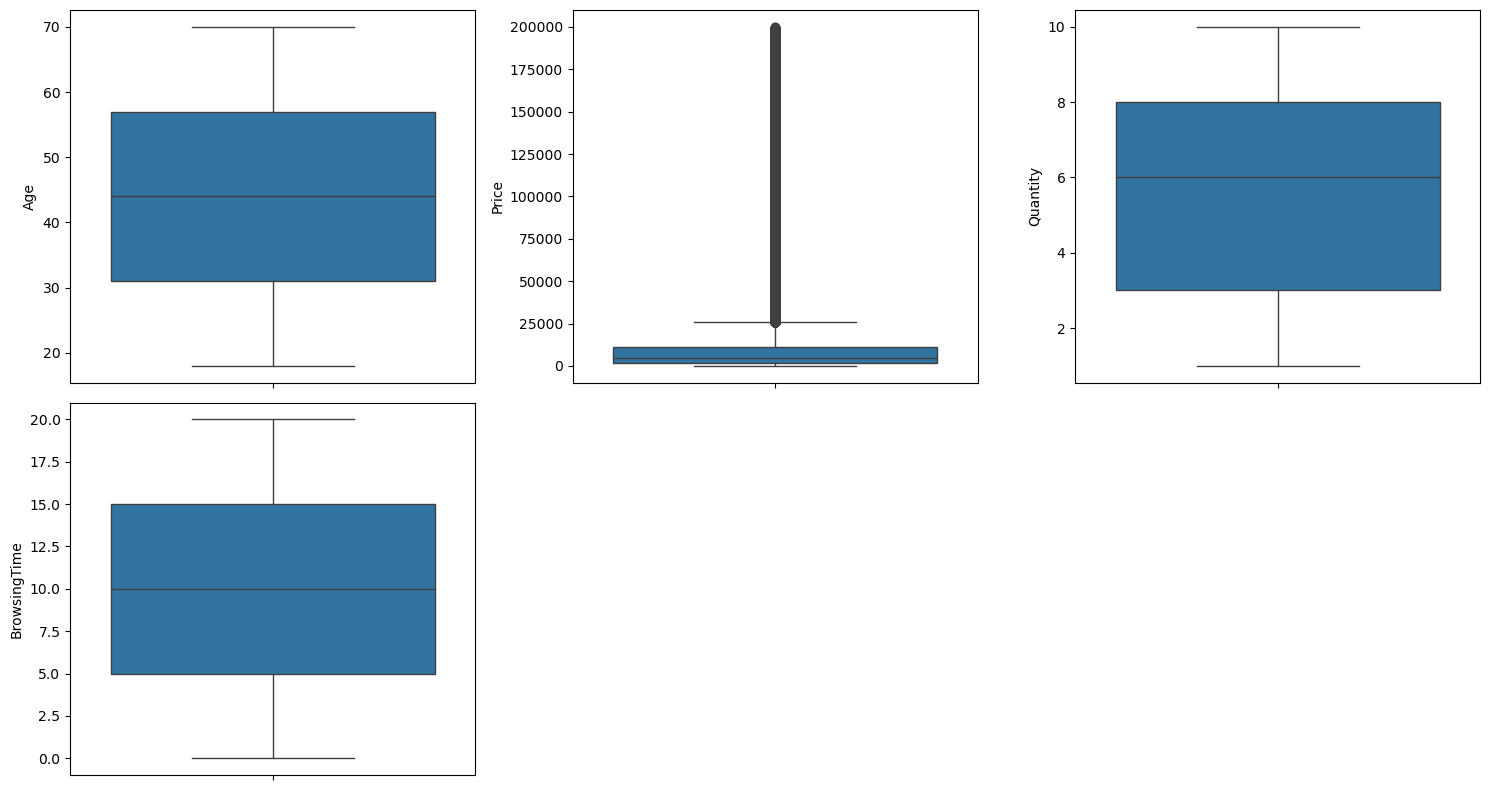

In [30]:
plt.figure(figsize=(15,8))
t=1
for i in num:
    plt.subplot(2,3,t)
    sns.boxplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')


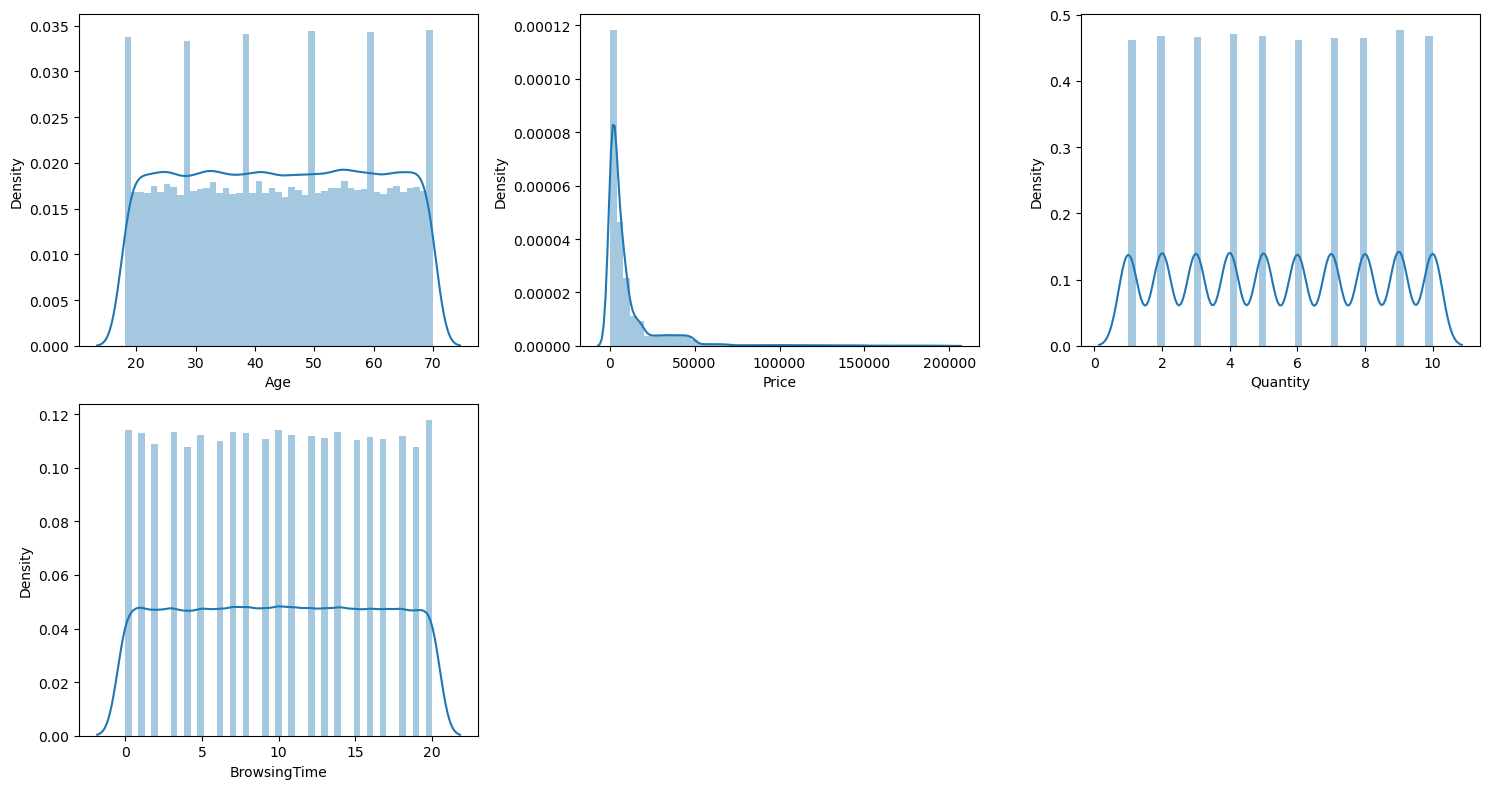

In [32]:
plt.figure(figsize=(15,8))
t=1
for i in num:
    plt.subplot(2,3,t)
    sns.distplot(df[i])
    t+=1
plt.tight_layout()
plt.show()

In [33]:
# insights for numerical columns 

# CATEGORY COLUMNS

In [35]:
#Statiscal analysis cat

In [36]:
print(cat)

['Device', 'City', 'Product', 'PurchaseDate', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date', 'hour']


In [37]:
df[['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur']].describe()

,Device,City,Product,Age_group,day,time_dur
count,100000,100000,100000,100000,100000,100000
unique,3,49,49,3,7,6
top,Tablet,Thiruvananthapuram,Wireless Earbuds,Adult,Wednesday,Early Morning
freq,33570,2144,2128,56542,14411,24937


In [38]:
for i in cat:
    print()
    print(i)
    print(f'No of Unique {i} :{df[i].nunique()}')
    print(df[i].unique())
    
    print('*********************************')


Device
No of Unique Device :3
['Mobile' 'Tablet' 'Desktop']
*********************************

City
No of Unique City :49
['Vadodara' 'Kolkata' 'Meerut' 'Faridabad' 'Lucknow' 'Varanasi' 'Hubli'
 'Jabalpur' 'Raipur' 'Kota' 'Bhopal' 'Bareilly' 'Pune' 'Jodhpur'
 'Chandigarh' 'Thane' 'Thiruvananthapuram' 'Ahmedabad' 'Amritsar'
 'Chennai' 'Tiruchirappalli' 'Allahabad' 'Vijayawada' 'Tiruppur' 'Patna'
 'Gwalior' 'Nagpur' 'Ranchi' 'Navi Mumbai' 'Mysore' 'Moradabad' 'Srinagar'
 'Kanpur' 'Surat' 'Hyderabad' 'Guwahati' 'Agra' 'Mumbai' 'Delhi'
 'Bangalore' 'Ludhiana' 'Dhanbad' 'Indore' 'Aurangabad' 'Rajkot' 'Howrah'
 'Solapur' 'Jaipur' 'Nashik']
*********************************

Product
No of Unique Product :49
['Smart Thermostat' 'Camera' 'Microphone' 'Action Camera' 'Headphones'
 'Wireless Keyboard' 'Gaming Headset' 'Voice Assistant' 'Security Camera'
 'Gaming Console' 'Printer' 'Mouse' 'Wireless Earbuds' 'SD Card'
 'Projector' 'Smart Lock' 'Smart Bulb' 'Monitor' 'MicroSD Card'
 'Smartwatch' '

In [39]:
for i in cat:
    print()
    print(df[i].value_counts())
    print()
    print(df[i].value_counts(normalize=True)*100)


Device
Tablet     33570
Desktop    33416
Mobile     33014
Name: count, dtype: int64

Device
Tablet     33.570
Desktop    33.416
Mobile     33.014
Name: proportion, dtype: float64

City
Thiruvananthapuram    2144
Vijayawada            2138
Surat                 2127
Dhanbad               2105
Nagpur                2101
Hubli                 2086
Gwalior               2078
Kota                  2072
Jaipur                2071
Guwahati              2062
Ranchi                2061
Kolkata               2060
Rajkot                2060
Ludhiana              2060
Lucknow               2058
Indore                2057
Patna                 2055
Jabalpur              2052
Moradabad             2052
Tiruppur              2051
Bareilly              2049
Pune                  2048
Raipur                2047
Jodhpur               2044
Mumbai                2042
Navi Mumbai           2036
Faridabad             2035
Agra                  2035
Mysore                2031
Howrah                2029
Meer

In [40]:
print(cat)

['Device', 'City', 'Product', 'PurchaseDate', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date', 'hour']


In [41]:
# univariate Visualisation 
cat_colu=['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date']

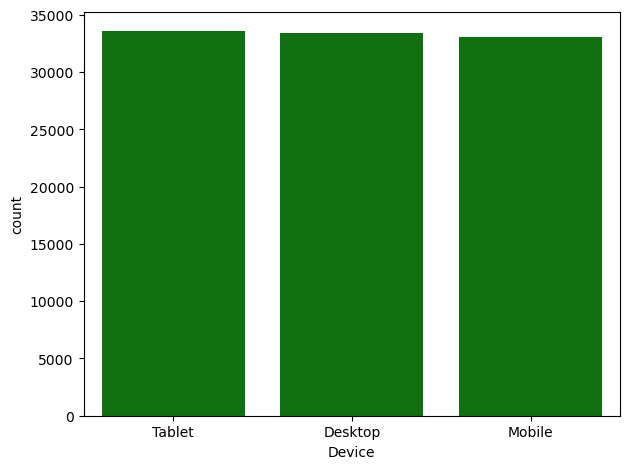

In [42]:
sns.barplot(df['Device'].value_counts(),color='Green')
plt.tight_layout()
plt.show()

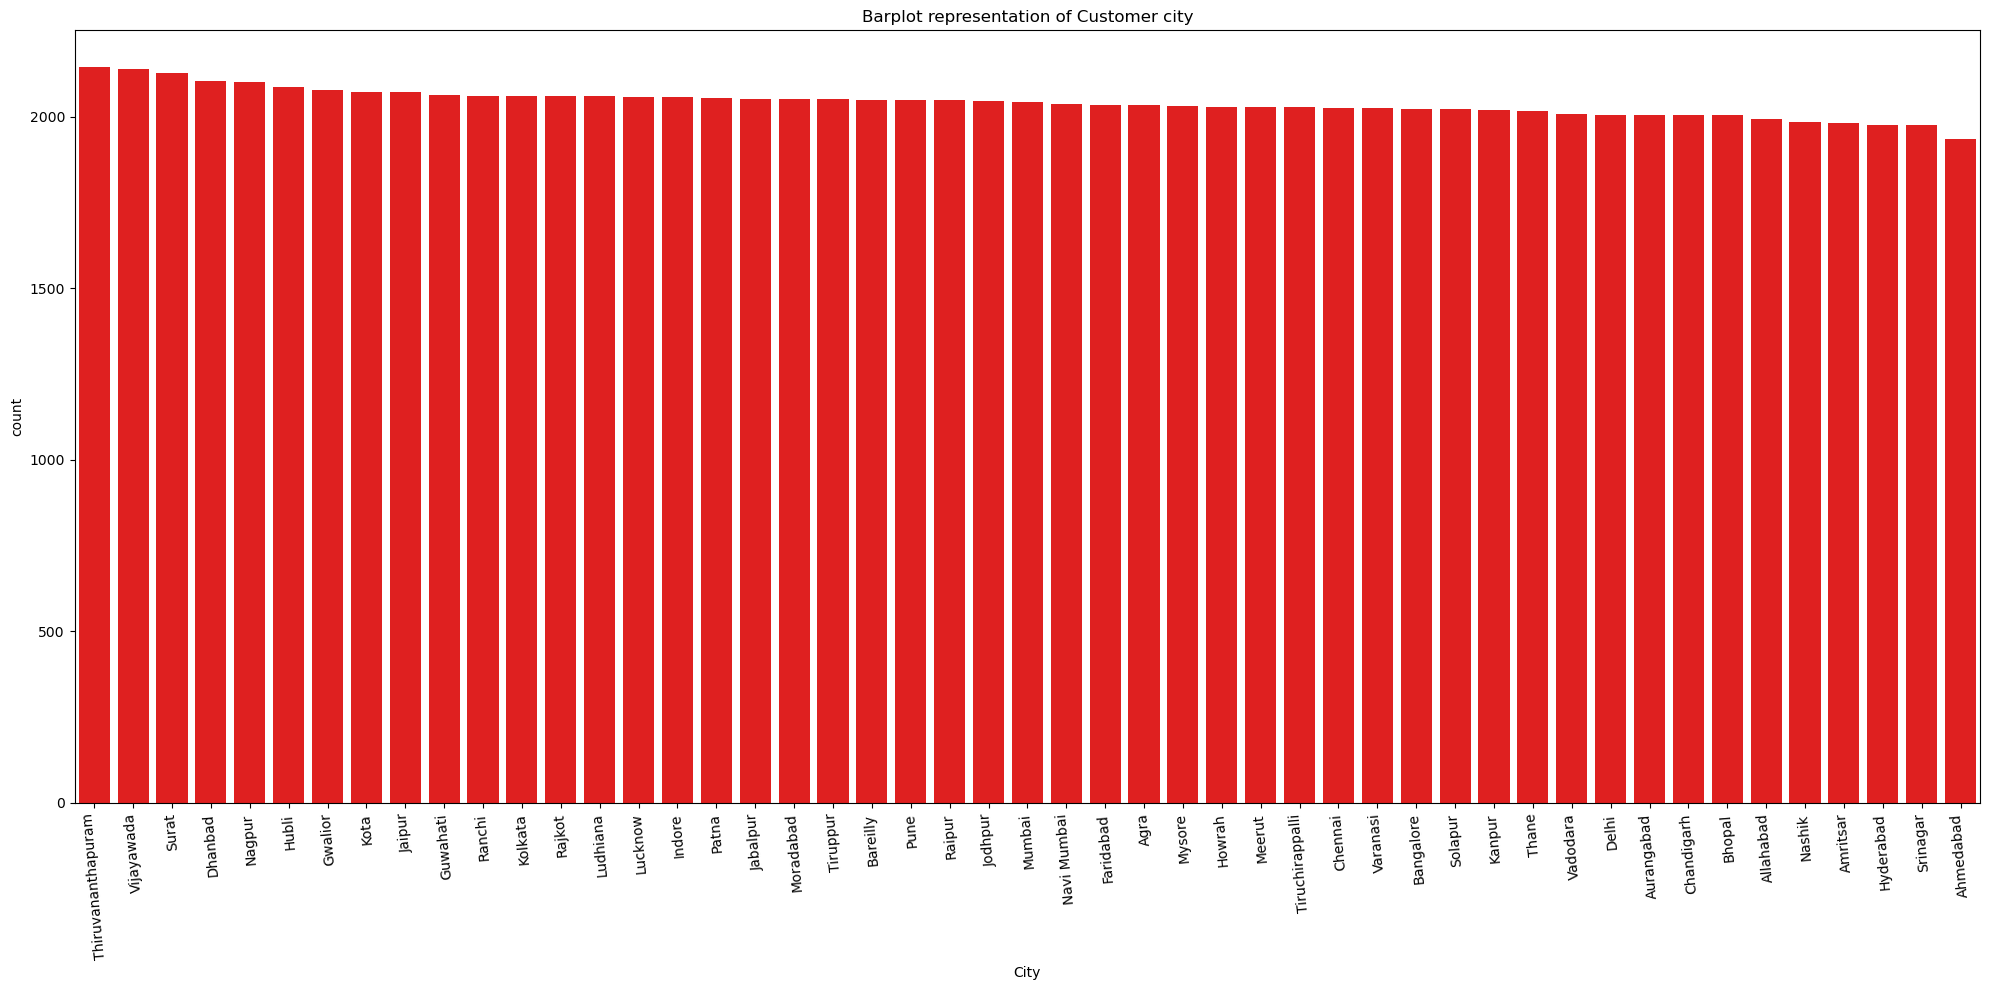

In [43]:
plt.figure(figsize=(20,10))
sns.barplot(df['City'].value_counts(),color='Red')
plt.title(f'Barplot representation of Customer city')
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()

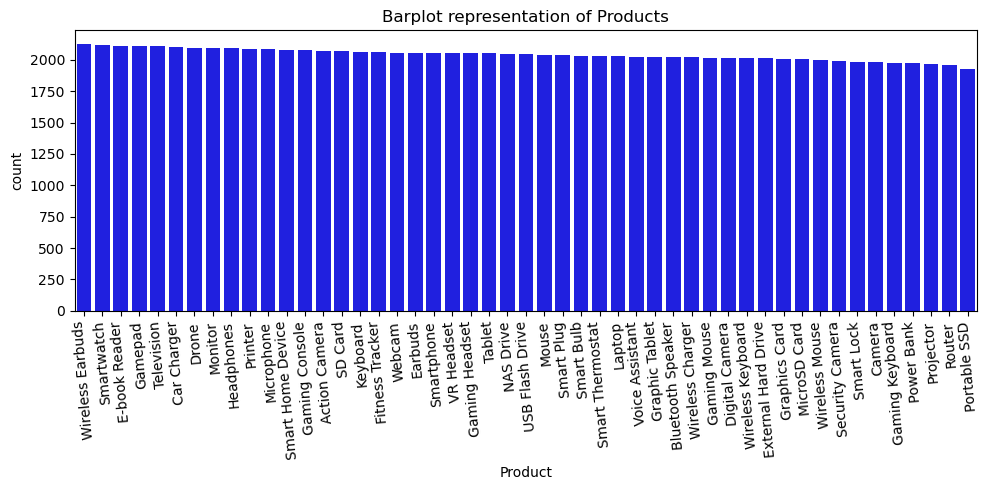

In [44]:
#Product
plt.figure(figsize=(10,5))
sns.barplot(df['Product'].value_counts(),color='blue')
plt.title(f'Barplot representation of Products')
plt.xticks(rotation=95)
plt.tight_layout()
plt.show()


In [45]:
print(cat_colu)

['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date']


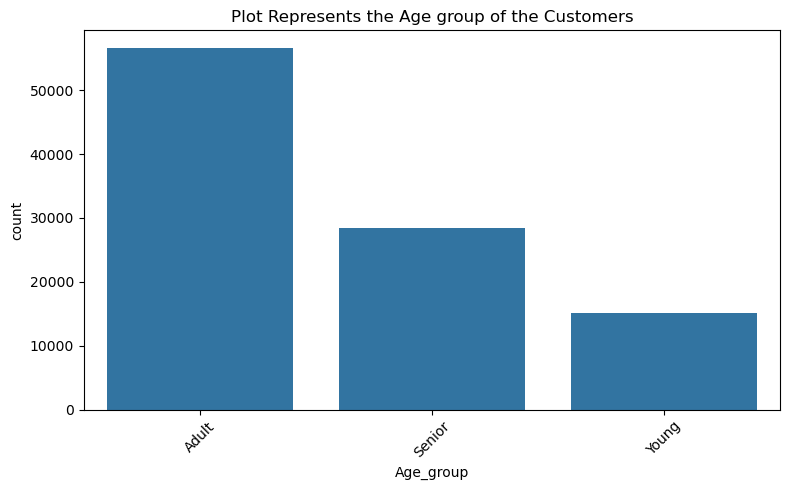

In [46]:
plt.figure(figsize=(8,5))
sns.barplot(df['Age_group'].value_counts())
plt.title('Plot Represents the Age group of the Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

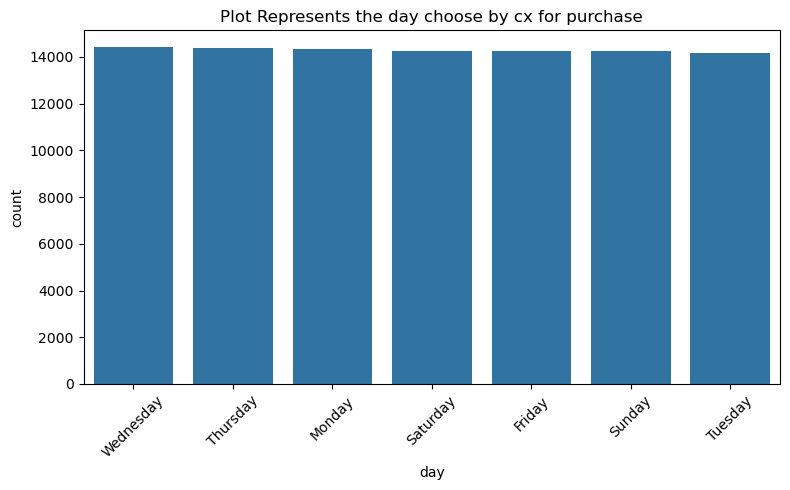

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(df['day'].value_counts())
plt.title('Plot Represents the day choose by cx for purchase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

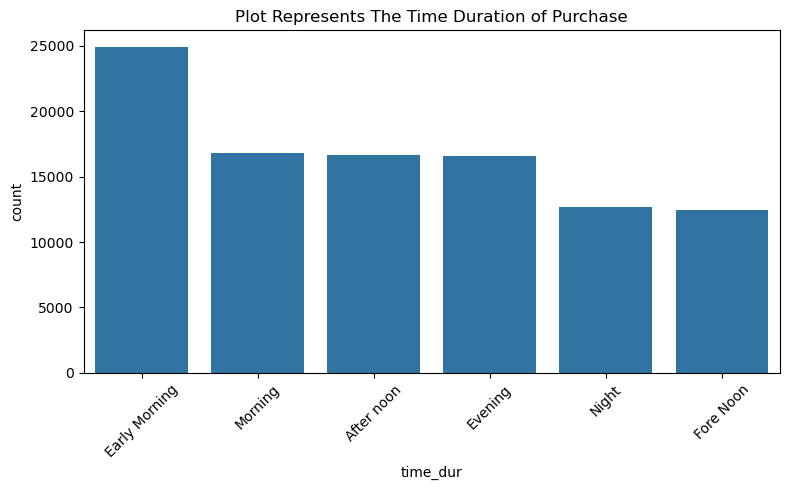

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(df['time_dur'].value_counts())
plt.title('Plot Represents The Time Duration of Purchase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

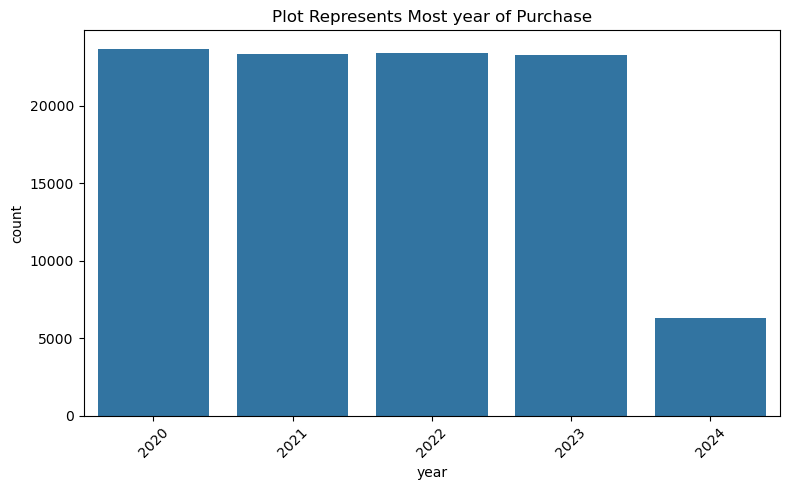

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(df['year'].value_counts())
plt.title('Plot Represents Most year of Purchase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

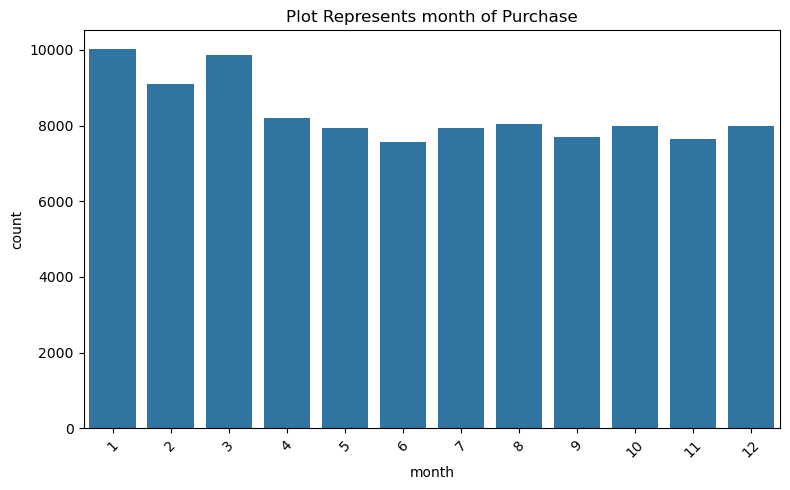

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(df['month'].value_counts())
plt.title('Plot Represents month of Purchase')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Inference 
* Out of 12 months customers prefered MARCH and JANUARY mostly while compared to other months for purchasing products.
* it may due to festivel session and Financial year ending plannings.
* Offers doesnt catch up these customers like in the dhassara to diwalis timing where offers and discounts are more.

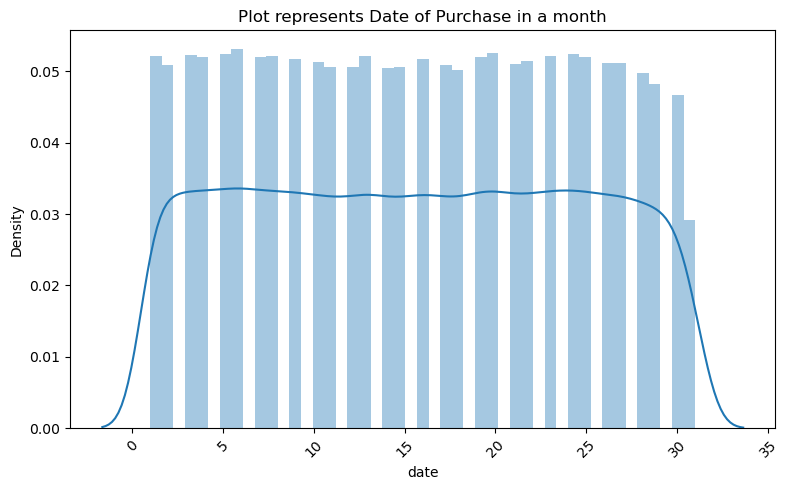

In [51]:
plt.figure(figsize=(8,5))
sns.distplot(df['date'])
plt.title('Plot represents Date of Purchase in a month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bivariate  analysis on numerical data 

In [52]:

print(num)


['Age', 'Price', 'Quantity', 'BrowsingTime']


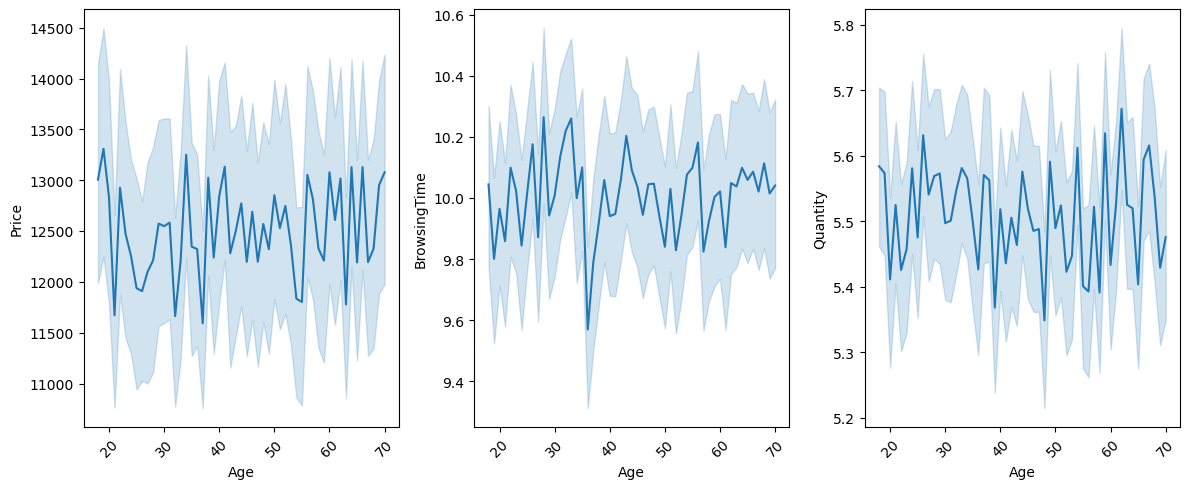

In [53]:
plt.figure(figsize=(12,5))
t=1
for i in ['Price','BrowsingTime','Quantity']:
    plt.subplot(1,3,t)
    sns.lineplot(x=df['Age'],y=df[i])
    plt.xticks(rotation=45)
    t += 1
plt.tight_layout()
plt.show()

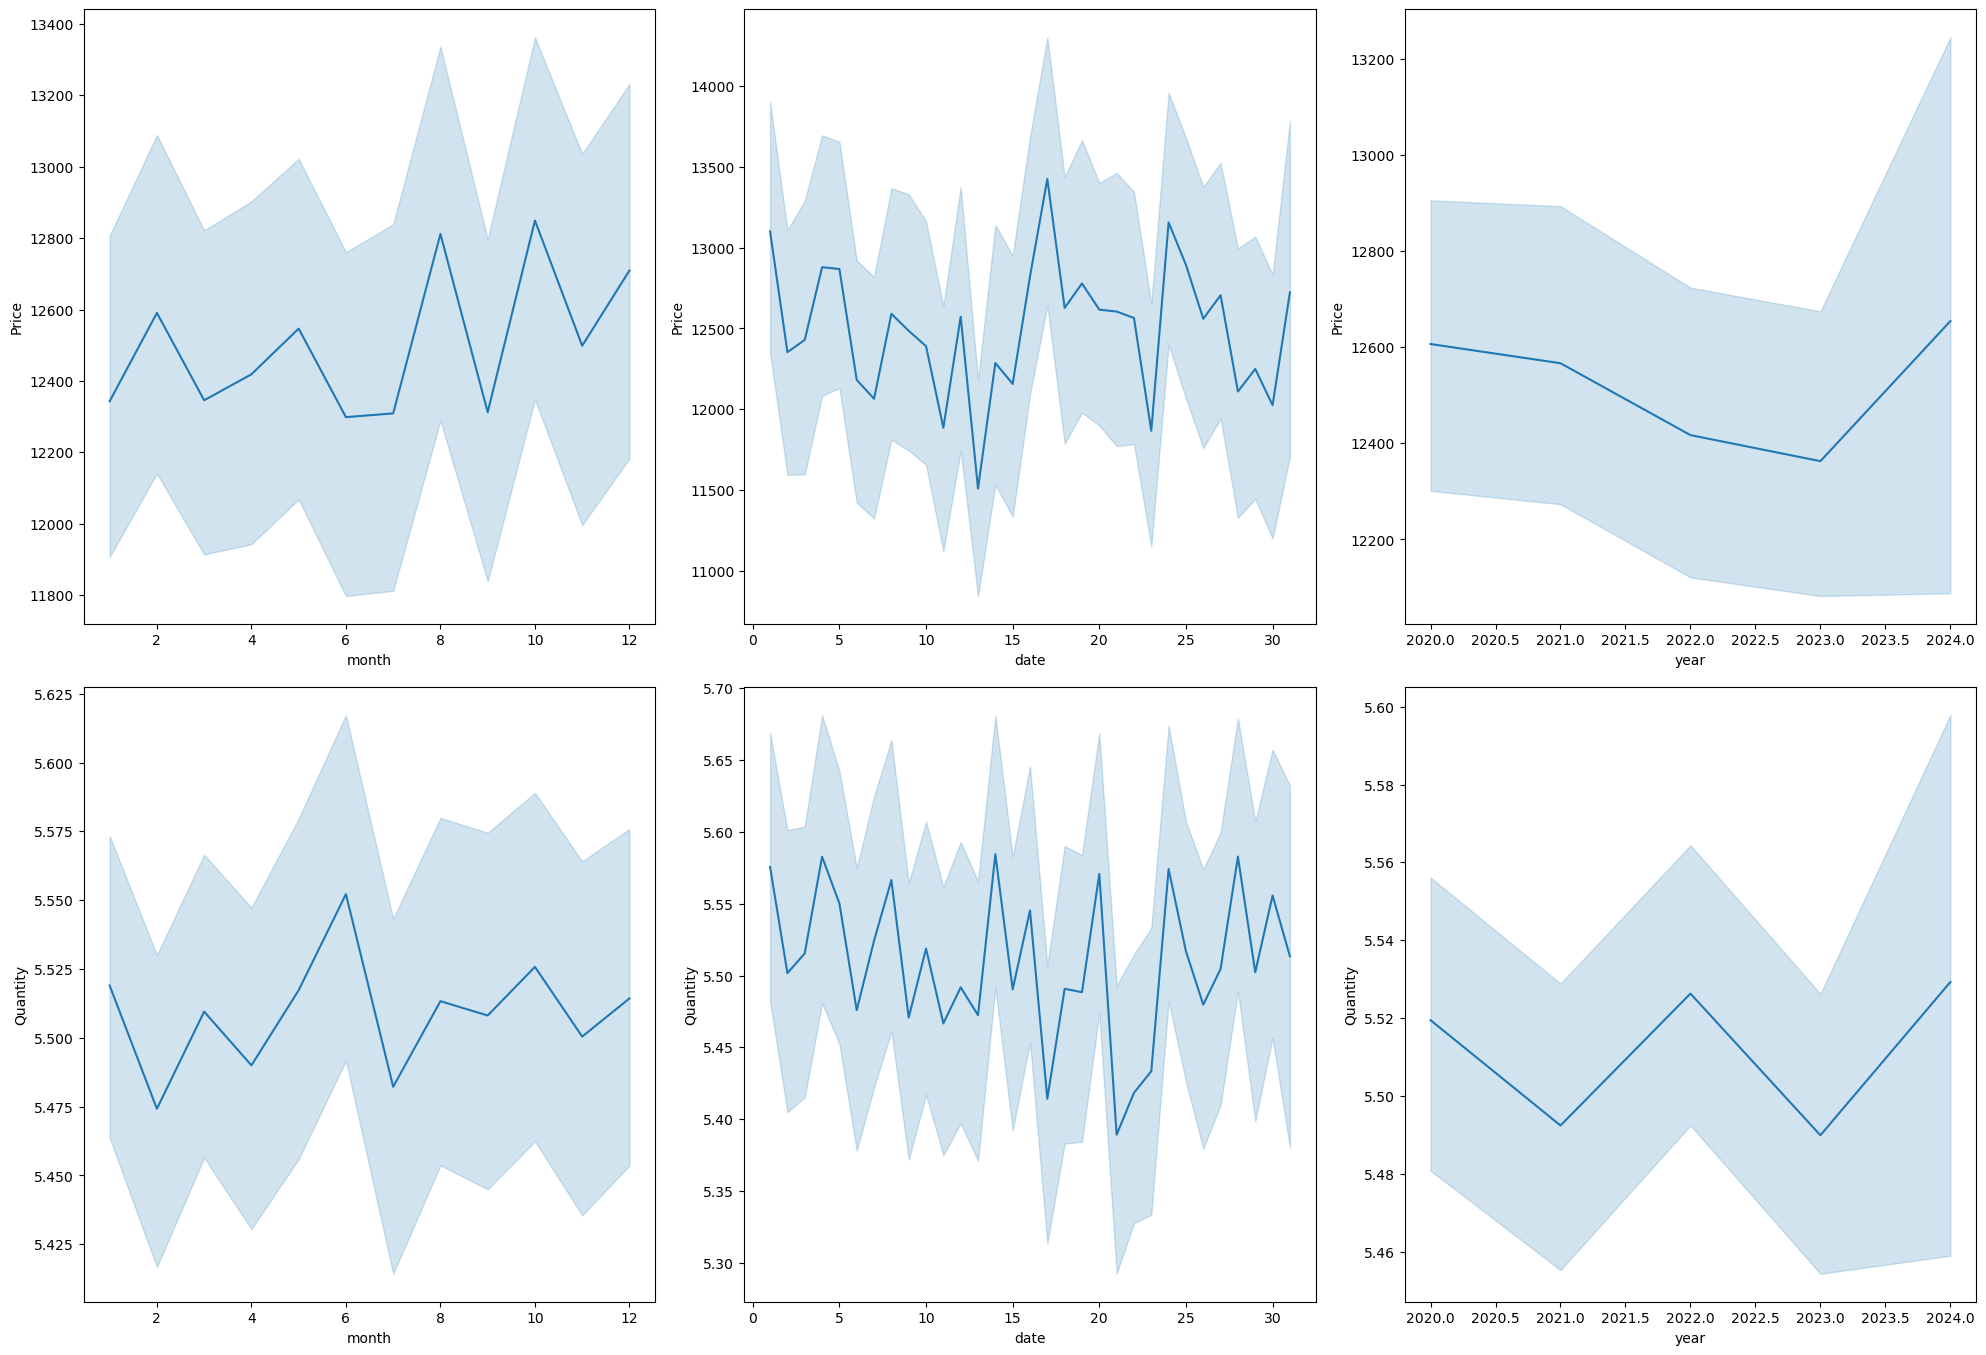

In [54]:
plt.figure(figsize=(20,20))
t = 1
for i in ['Price', 'Quantity']:
    for j in ['month', 'date', 'year']:
        plt.subplot(3,3,t)
        sns.lineplot(y = df[i], x = df[j], palette='pastel')
        t += 1

plt.tight_layout()
plt.show()

## CAT VS CAT

In [56]:
print(cat_colu)

['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date']


In [57]:
plt.figure(figsize=(10,8))
ct=pd.crosstab(df['Device'],df['City'])
ct

City,Agra,Ahmedabad,Allahabad,Amritsar,Aurangabad,Bangalore,Bareilly,Bhopal,Chandigarh,Chennai,...,Solapur,Srinagar,Surat,Thane,Thiruvananthapuram,Tiruchirappalli,Tiruppur,Vadodara,Varanasi,Vijayawada
Device,,,,,,,,,,,,,,,,,,,,,
Desktop,678,623,677,675,698,691,720,661,659,724,...,665,652,705,698,688,691,693,690,655,718
Mobile,668,666,639,627,678,644,689,666,650,635,...,675,651,724,632,760,651,668,660,689,674
Tablet,689,646,676,679,629,688,640,677,695,667,...,682,672,698,685,696,686,690,657,680,746


<Figure size 1000x800 with 0 Axes>

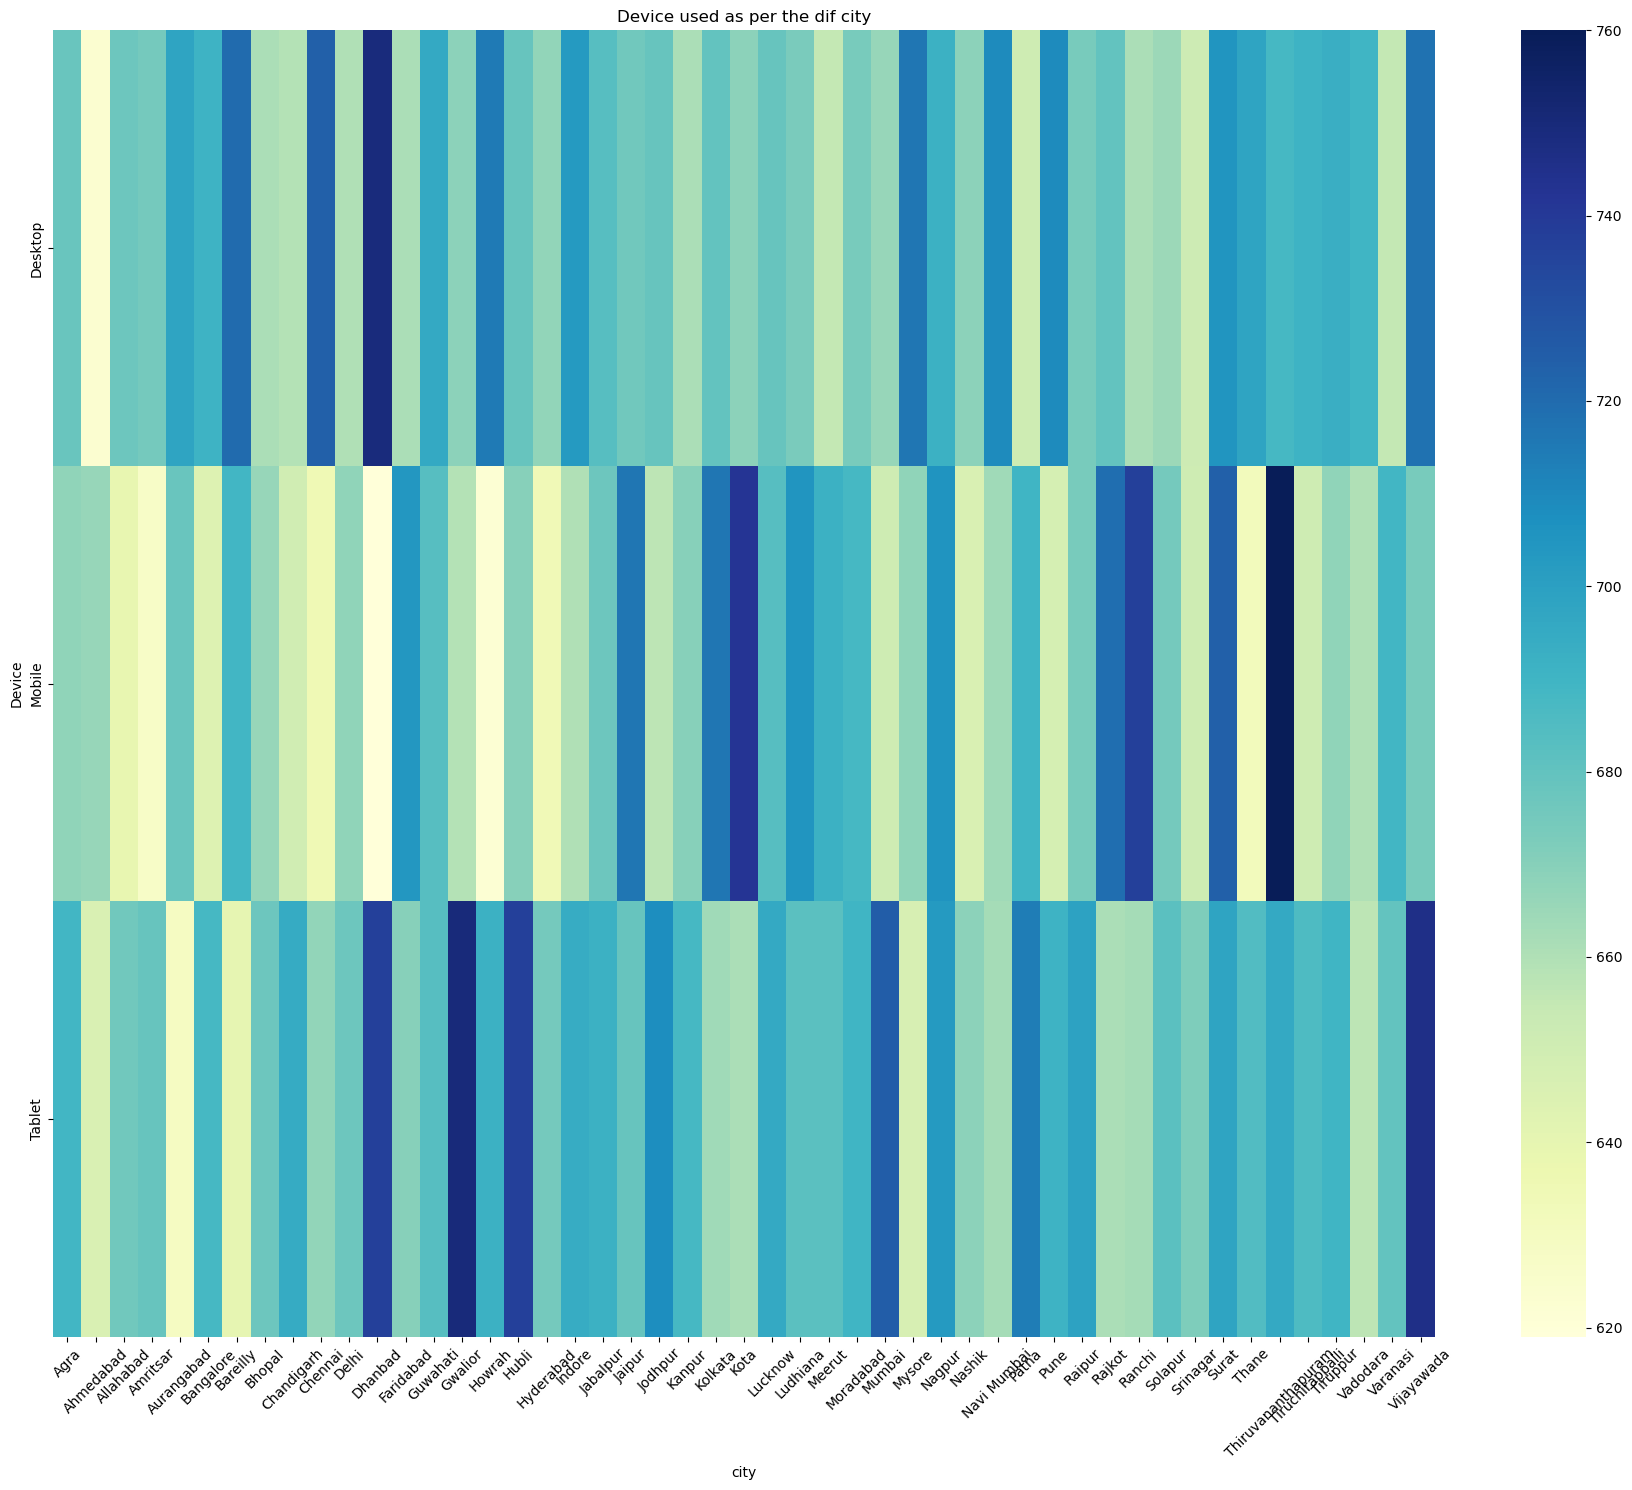

In [58]:
#@ to Visualize this 
plt.figure(figsize=(18,15))
sns.heatmap(ct,annot=False, cmap='YlGnBu')
plt.xlabel('city')
plt.ylabel('Device')
plt.title(f'Device used as per the dif city')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
print(cat_colu)

['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date']


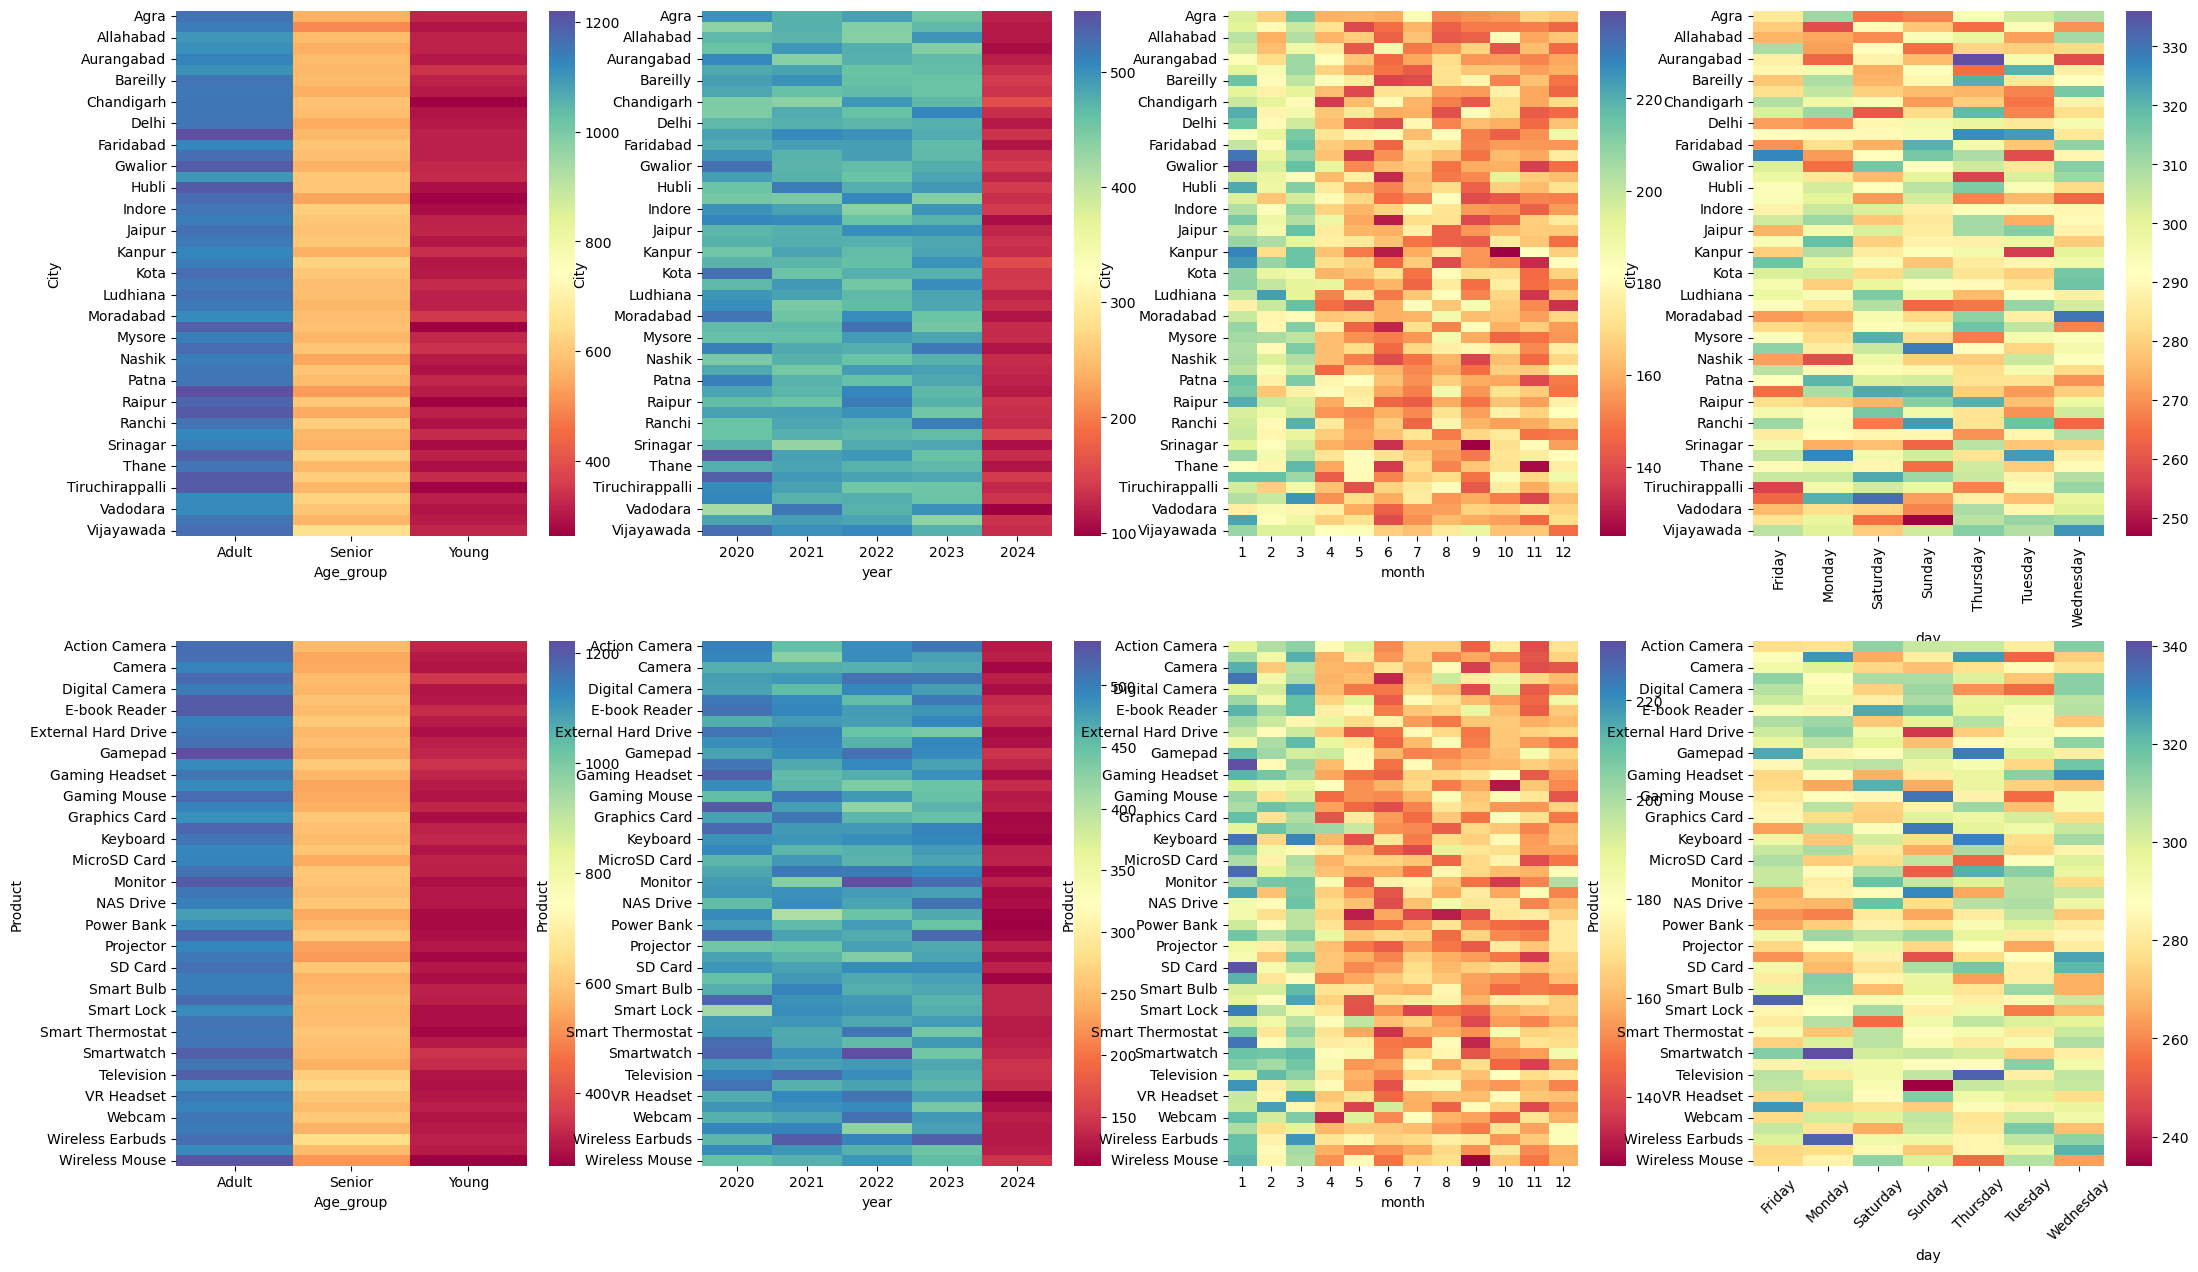

In [60]:
plt.figure(figsize=(26,15))
t=1
for i in ['City','Product']:
    for j in ['Age_group','year','month','day']:
        plt.subplot(2,4,t)
        sns.heatmap(pd.crosstab(df[i],df[j]),cmap='Spectral')
        t +=1    
plt.xticks(rotation=45)
plt.tight_layout
plt.show()
        

# Comparing the age_group with time 

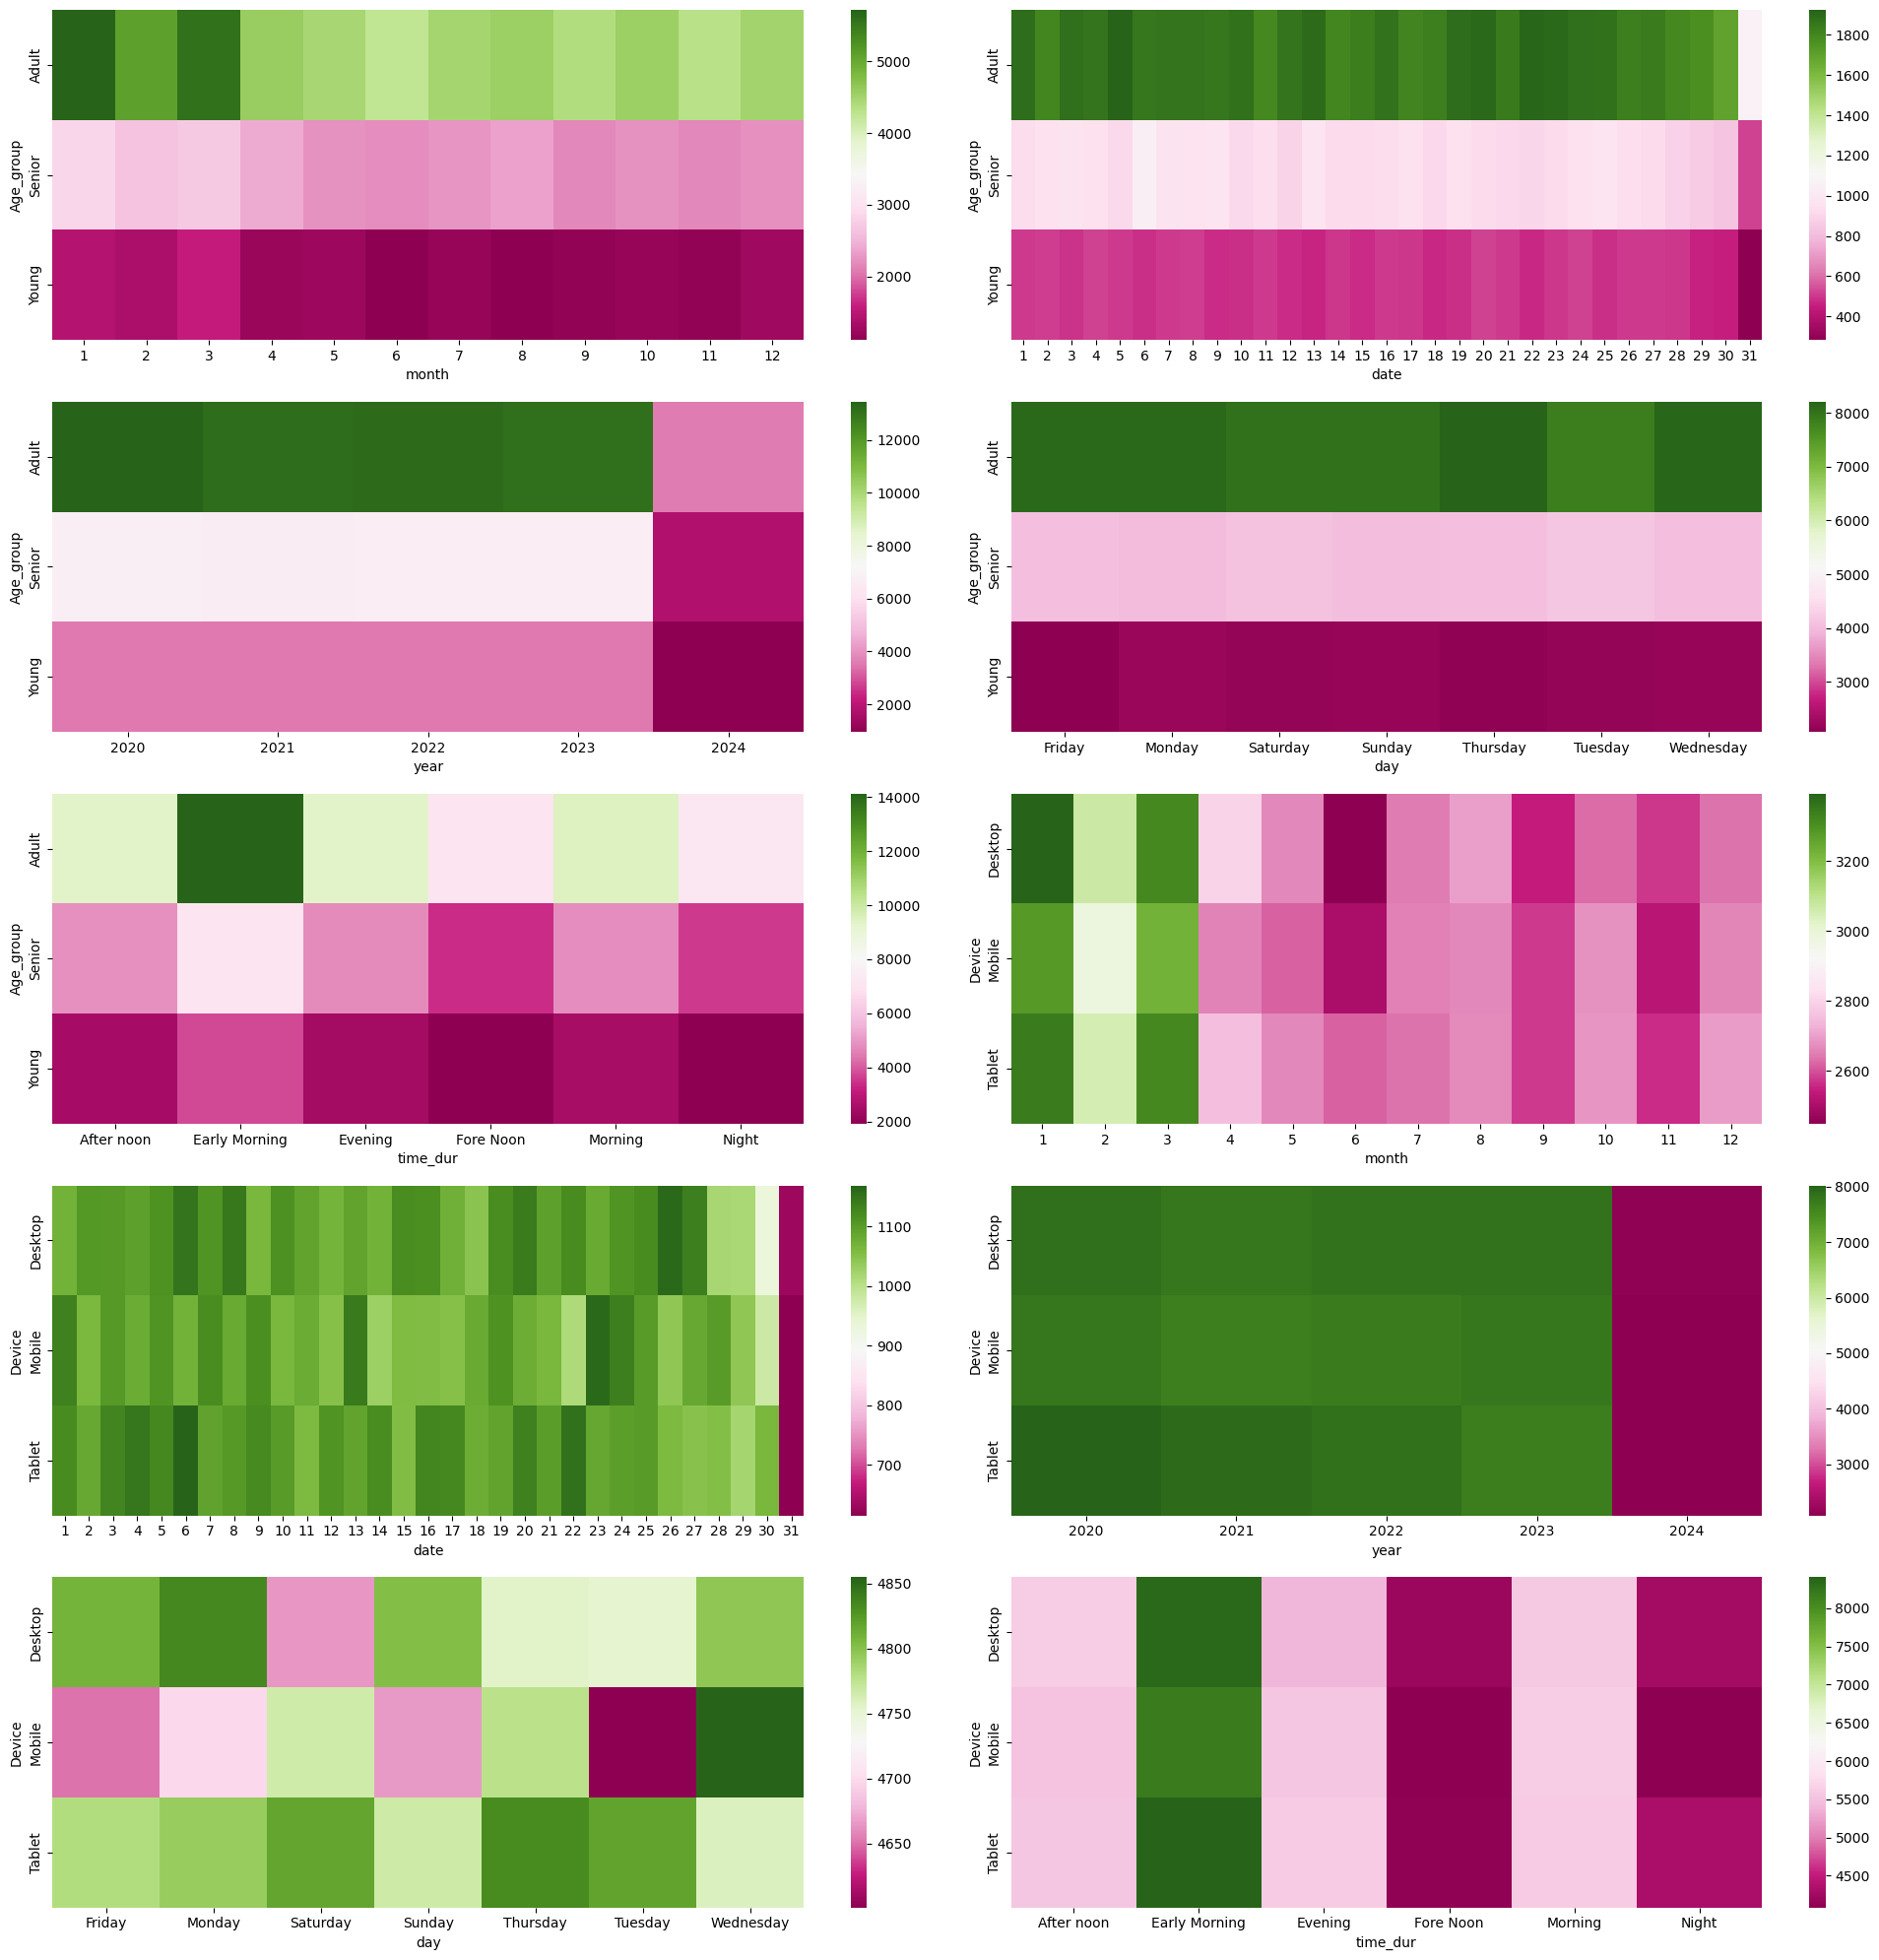

In [62]:
plt.figure(figsize=(20,20))
t = 1
for i in ['Age_group','Device']:
    for j in ['month', 'date', 'year','day','time_dur']:
        plt.subplot(5,2,t)
        sns.heatmap(pd.crosstab(df[i],df[j]),cmap='PiYG')
        t += 1

plt.tight_layout()
plt.show()

## Nmerical vs Categorical

In [64]:
print(num)
print(cat_colu)

['Age', 'Price', 'Quantity', 'BrowsingTime']
['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date']


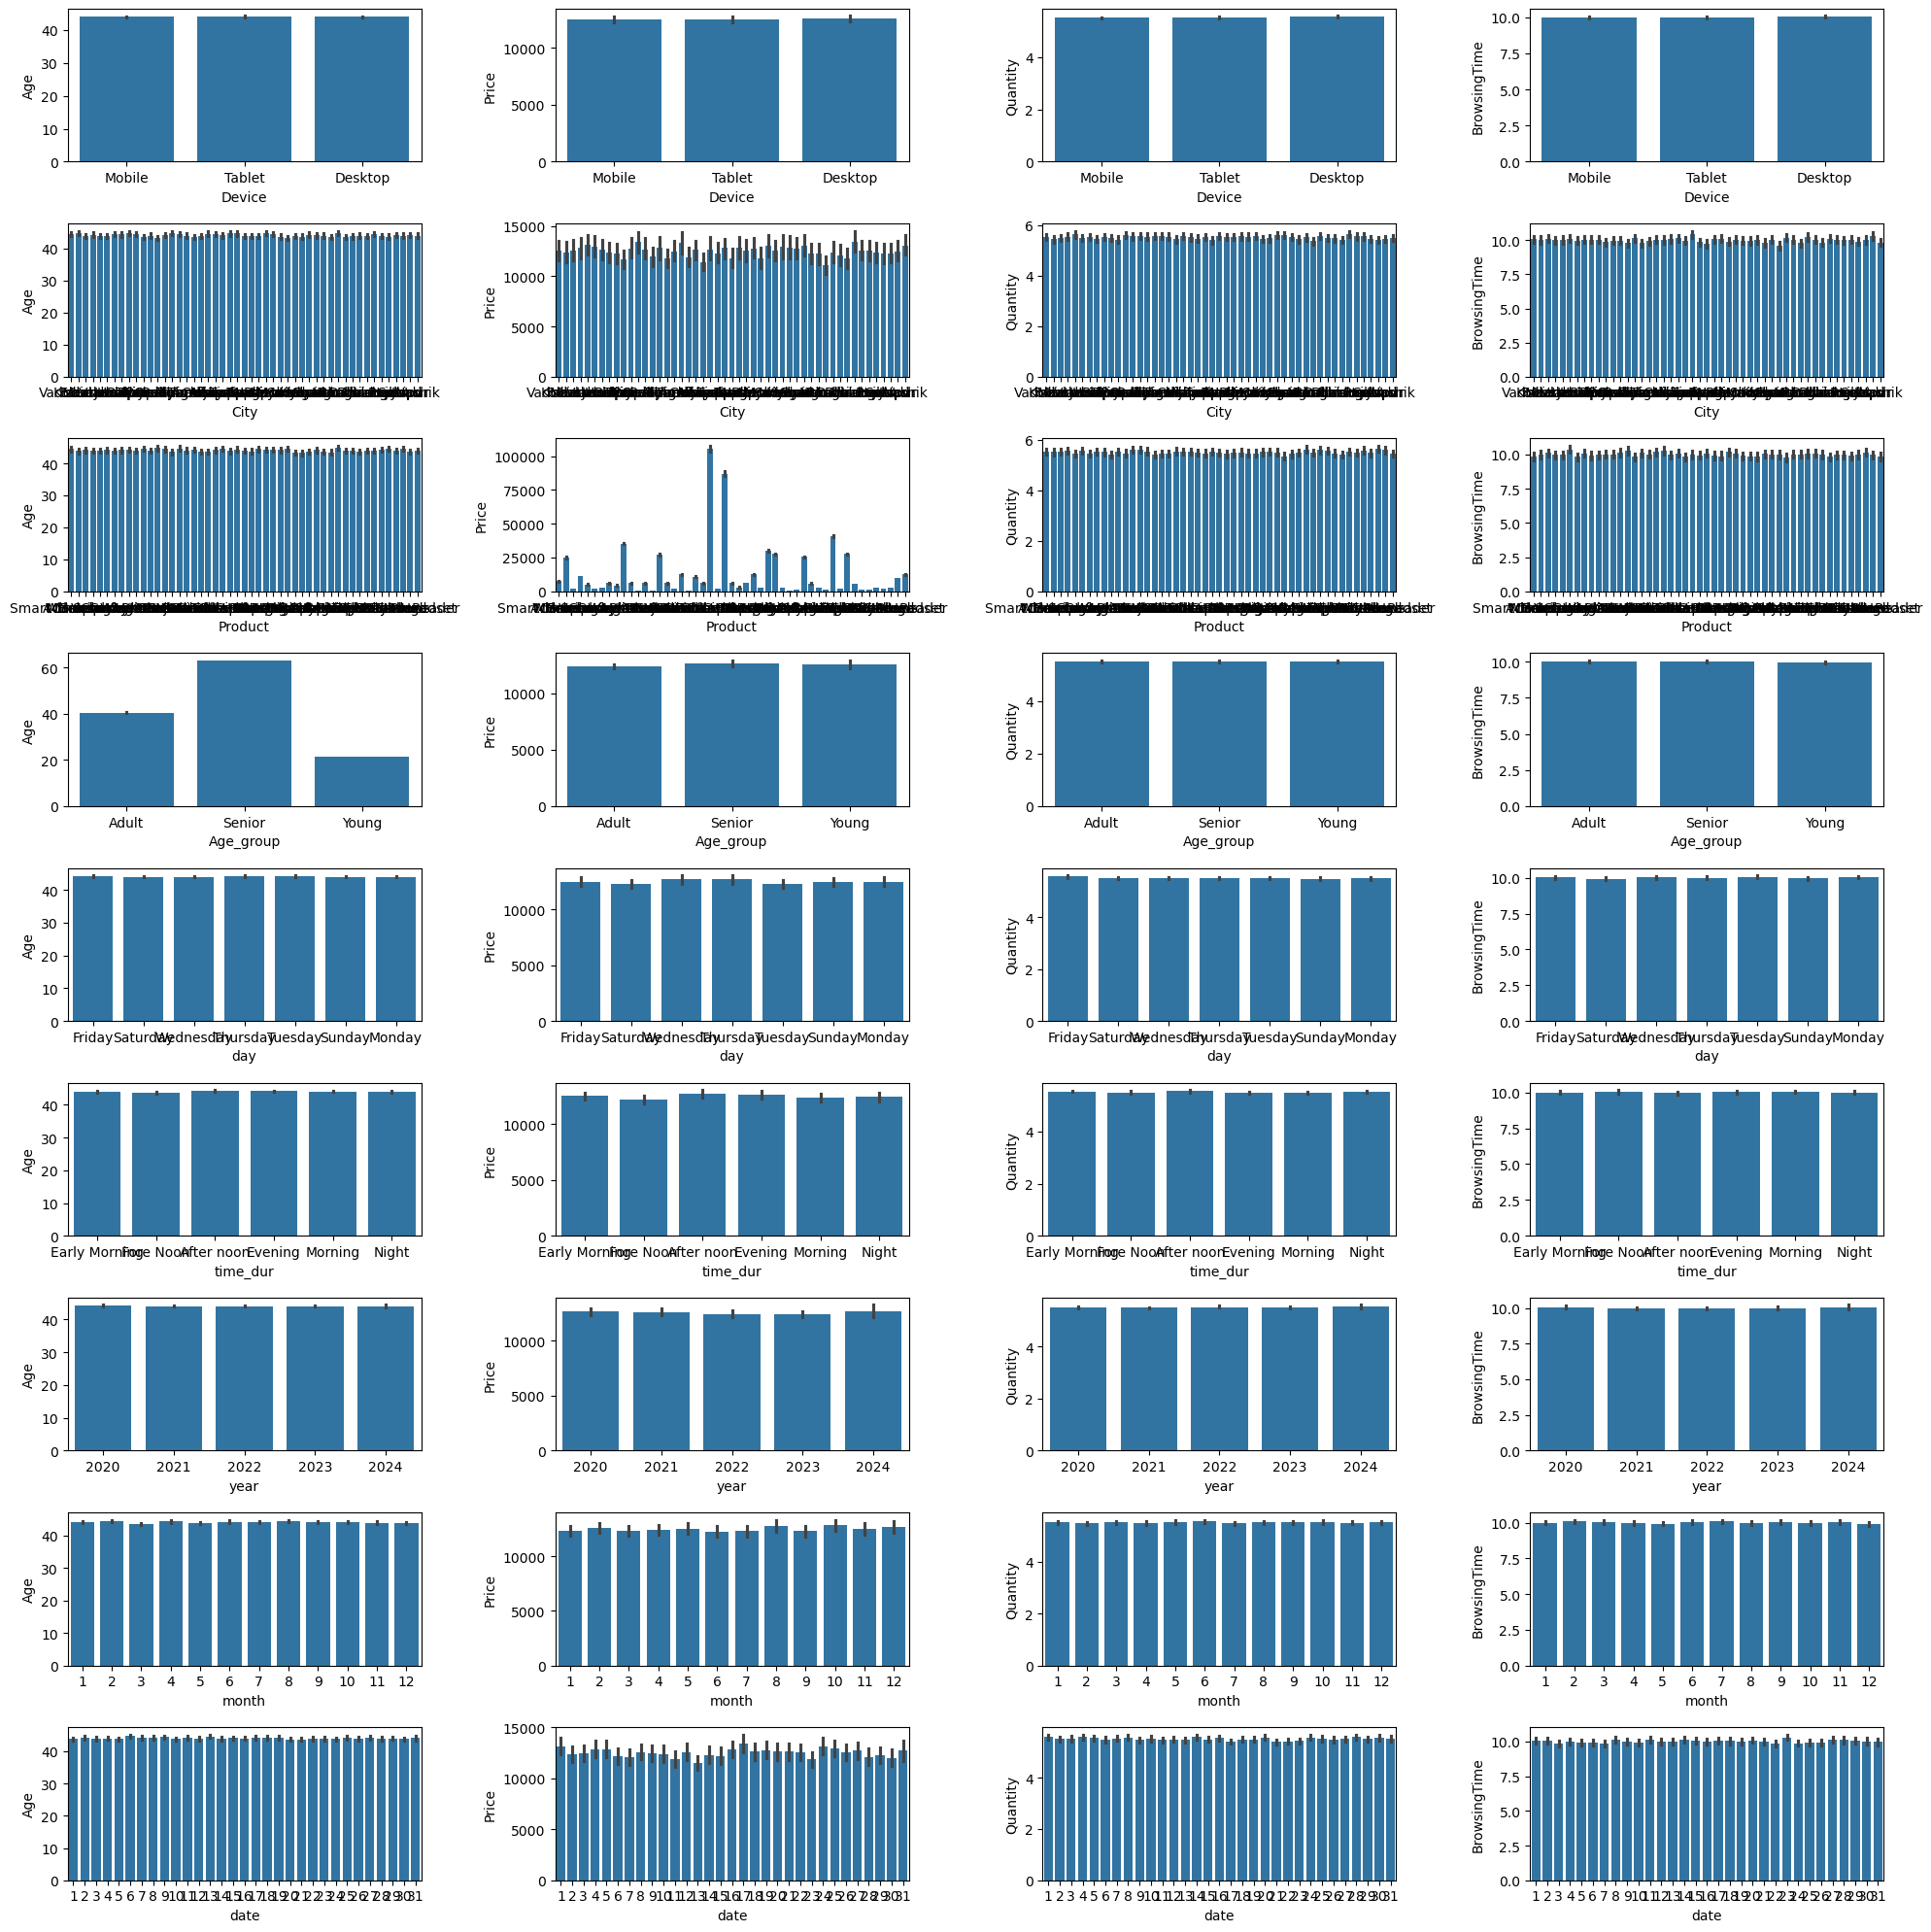

In [65]:
plt.figure(figsize=(20,20))
t=1
for i in ['Device', 'City', 'Product', 'Age_group', 'day', 'time_dur', 'year', 'month', 'date']:
    for j in['Age', 'Price', 'Quantity', 'BrowsingTime']:
        plt.subplot(9,4,t)
        sns.barplot(data=df,x=i,y=j,estimator=np.mean)
        t+=1
plt.tight_layout()
plt.show()


In [66]:
# Copying the data frame for modeling and encoding purpose 

In [67]:
df.head(2)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Age_group,year,month,day,hour,date,time_dur
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.41,2,2021-08-06 05:29:38,9,Adult,2021,8,Friday,5,6,Early Morning
1,11891,26,Tablet,Vadodara,Camera,35274.01,6,2022-11-25 01:54:51,1,Adult,2022,11,Friday,1,25,Early Morning


In [68]:
df1=df.copy()
df1.head(2)

,CustomerID,Age,Device,City,Product,Price,Quantity,PurchaseDate,BrowsingTime,Age_group,year,month,day,hour,date,time_dur
0,9597,42,Mobile,Vadodara,Smart Thermostat,4441.41,2,2021-08-06 05:29:38,9,Adult,2021,8,Friday,5,6,Early Morning
1,11891,26,Tablet,Vadodara,Camera,35274.01,6,2022-11-25 01:54:51,1,Adult,2022,11,Friday,1,25,Early Morning


In [69]:
df1=df1.drop(columns=['CustomerID','PurchaseDate'],axis=1)
df1.head(2)

,Age,Device,City,Product,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,date,time_dur
0,42,Mobile,Vadodara,Smart Thermostat,4441.41,2,9,Adult,2021,8,Friday,5,6,Early Morning
1,26,Tablet,Vadodara,Camera,35274.01,6,1,Adult,2022,11,Friday,1,25,Early Morning


In [278]:

df.to_csv('ecommerce_data.csv', index=False)

## ENCODING THE CATEGORY COLUMNS

In [71]:
df1['Device']=df1['Device'].replace({'Mobile':0,'Tablet':1,'Desktop':2})
df1.head(2)

,Age,Device,City,Product,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,date,time_dur
0,42,0,Vadodara,Smart Thermostat,4441.41,2,9,Adult,2021,8,Friday,5,6,Early Morning
1,26,1,Vadodara,Camera,35274.01,6,1,Adult,2022,11,Friday,1,25,Early Morning


In [72]:
# CITY

In [73]:
df1['City'].nunique()# There are 49 unique cities in this data set we peoceed with label encoding 

49

In [74]:
# get_dummies
df1=pd.get_dummies(df1,columns=['City','Product'],drop_first=True,dtype=int)
df1.head(2)

,Age,Device,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,...,Product_Tablet,Product_Television,Product_USB Flash Drive,Product_VR Headset,Product_Voice Assistant,Product_Webcam,Product_Wireless Charger,Product_Wireless Earbuds,Product_Wireless Keyboard,Product_Wireless Mouse
0,42,0,4441.41,2,9,Adult,2021,8,Friday,5,...,0,0,0,0,0,0,0,0,0,0
1,26,1,35274.01,6,1,Adult,2022,11,Friday,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df1.shape

(100000, 108)

In [76]:
# Age 

In [77]:
df1['Age_group'].unique()

array(['Adult', 'Senior', 'Young'], dtype=object)

In [172]:
df1['Age_group']=df1['Age_group'].replace({'Young':0,'Adult':1,'Senior':2})
df1.head(2)

,Age,Device,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,...,Product_Tablet,Product_Television,Product_USB Flash Drive,Product_VR Headset,Product_Voice Assistant,Product_Webcam,Product_Wireless Charger,Product_Wireless Earbuds,Product_Wireless Keyboard,Product_Wireless Mouse
0,42,0,4441.41,2,9,1,2021,8,5.0,5,...,0,0,0,0,0,0,0,0,0,0
1,26,1,35274.01,6,1,1,2022,11,5.0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df1['day'].unique()

array(['Friday', 'Saturday', 'Wednesday', 'Thursday', 'Tuesday', 'Sunday',
       'Monday'], dtype=object)

In [194]:
df1['time_dur'].unique()

array(['Early Morning', 'Fore Noon', 'After noon', 'Evening', 'Morning',
       'Night'], dtype=object)

In [198]:
segment_order=[['Early Morning','Morning','Fore Noon','After noon','Evening','Night']]
oe= OrdinalEncoder(categories=segment_order)
df1['time_dur']=oe.fit_transform(df1[['time_dur']])


array([0., 2., 3., 4., 1., 5.])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']])
df1['day']=oe.fit_transform(df1[['day']])
df1.head(2)

# SCALING THE DATA 

In [212]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_scaled=pd.DataFrame(sc.fit_transform(df1),columns=df1.columns)
df1_scaled

,Age,Device,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,...,Product_Tablet,Product_Television,Product_USB Flash Drive,Product_VR Headset,Product_Voice Assistant,Product_Webcam,Product_Wireless Charger,Product_Wireless Earbuds,Product_Wireless Keyboard,Product_Wireless Mouse
0,-0.134442,-1.231872,-0.351207,-1.221325,-0.166199,-0.206795,-0.524266,0.498276,1.000729,-0.941413,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
1,-1.180335,-0.004932,0.992677,0.171081,-1.485727,-0.206795,0.280687,1.351703,1.000729,-1.519324,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
2,1.107556,1.222007,-0.510581,-1.221325,1.648151,1.342229,0.280687,1.636178,1.501253,-0.219024,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
3,-1.311072,1.222007,-0.065320,0.867285,-0.331140,-1.755819,1.085641,-1.208577,1.000729,0.647843,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
4,1.042187,1.222007,-0.422108,-0.177020,-0.001258,1.342229,-0.524266,0.782752,-0.000320,-1.374846,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.042187,-1.231872,1.109925,-0.525122,-1.650668,1.342229,1.085641,1.351703,-1.001370,0.214409,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
99996,1.042187,-0.004932,-0.430855,-0.177020,-0.331140,1.342229,0.280687,0.213800,-1.501894,0.358887,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
99997,-0.592021,-1.231872,-0.350158,0.867285,-0.001258,-0.206795,-0.524266,0.213800,-1.501894,1.514710,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784
99998,-1.376440,-1.231872,-0.522729,0.867285,1.483210,-1.755819,1.890594,-1.208577,-1.001370,0.792321,...,-0.144705,-0.146744,-0.14438,-0.144741,-0.143766,-0.144921,-0.143512,-0.147454,-0.143258,-0.142784


## Modeling Data

In [217]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=7,random_state=100)
kmeans.fit(df1_scaled)

  File "C:\Users\rajku\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\rajku\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\rajku\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\rajku\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KMeans(n_clusters=7, random_state=100)

In [223]:
df1['clusters']=kmeans.labels_
df1

,Age,Device,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,...,Product_Television,Product_USB Flash Drive,Product_VR Headset,Product_Voice Assistant,Product_Webcam,Product_Wireless Charger,Product_Wireless Earbuds,Product_Wireless Keyboard,Product_Wireless Mouse,clusters
0,42,0,4441.41,2,9,1,2021,8,5.0,5,...,0,0,0,0,0,0,0,0,0,4
1,26,1,35274.01,6,1,1,2022,11,5.0,1,...,0,0,0,0,0,0,0,0,0,4
2,61,2,784.92,2,20,2,2022,12,6.0,10,...,0,0,0,0,0,0,0,0,0,6
3,24,2,11000.48,8,8,0,2023,2,5.0,16,...,0,0,0,0,0,0,0,0,0,5
4,60,2,2814.74,5,10,2,2021,9,3.0,2,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,60,0,37964.02,4,0,2,2023,11,1.0,13,...,0,0,0,0,0,0,0,0,0,3
99996,60,1,2614.05,5,8,2,2022,7,0.0,14,...,0,0,0,0,0,0,0,0,0,6
99997,35,0,4465.47,8,10,1,2021,7,0.0,22,...,0,0,0,0,0,0,0,0,0,5
99998,23,0,506.21,8,19,0,2024,2,1.0,17,...,0,0,0,0,0,0,0,0,0,5


In [227]:
df1.groupby('clusters').mean()

,Age,Device,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,...,Product_Tablet,Product_Television,Product_USB Flash Drive,Product_VR Headset,Product_Voice Assistant,Product_Webcam,Product_Wireless Charger,Product_Wireless Earbuds,Product_Wireless Keyboard,Product_Wireless Mouse
clusters,,,,,,,,,,,,,,,,,,,,,
0,44.449828,0.999656,70621.840887,5.536254,9.874055,1.146048,2021.661684,6.266151,3.023368,11.578351,...,0.006701,0.357216,0.007560,0.008763,0.005670,0.007216,0.000000,0.008591,0.006873,0.005842
1,43.685031,0.989434,4610.001675,5.484528,10.167547,1.120503,2021.668679,6.300629,3.022893,11.706164,...,0.010314,0.001761,0.011572,0.009560,0.008302,0.012075,0.000000,0.012075,0.009057,0.009811
2,44.016610,0.990657,5353.844700,5.514404,10.022320,1.131326,2021.621853,6.303659,2.943680,11.586296,...,0.010382,0.003634,0.010122,0.009343,0.010641,0.012458,0.523748,0.010122,0.008046,0.010641
3,44.018149,1.008436,23023.449248,5.414110,10.017894,1.121933,2021.668712,6.235174,2.994632,11.563906,...,0.009714,0.002045,0.008436,0.012270,0.006902,0.012526,0.000000,0.010736,0.013292,0.013292
4,36.442015,1.003935,8598.612841,5.512759,10.018927,0.788394,2021.644314,6.243808,2.997345,5.978199,...,0.023394,0.000000,0.020770,0.024081,0.022800,0.021926,0.000000,0.022738,0.022582,0.022644
5,36.604946,1.002265,8615.012406,5.512086,9.996398,0.793710,2021.651394,6.261686,3.003490,18.036238,...,0.023206,0.000000,0.022983,0.020755,0.022909,0.022500,0.000000,0.023243,0.021906,0.023614
6,62.957982,1.011154,8622.468030,5.510643,10.007024,1.994849,2021.657131,6.219498,3.002810,11.520860,...,0.022095,0.000000,0.025372,0.023372,0.023159,0.023925,0.000000,0.025330,0.022946,0.020051


In [231]:
df1.groupby('clusters').median()

,Age,Device,Price,Quantity,BrowsingTime,Age_group,year,month,day,hour,...,Product_Tablet,Product_Television,Product_USB Flash Drive,Product_VR Headset,Product_Voice Assistant,Product_Webcam,Product_Wireless Charger,Product_Wireless Earbuds,Product_Wireless Keyboard,Product_Wireless Mouse
clusters,,,,,,,,,,,,,,,,,,,,,
0,45.0,1.0,64120.020,6.0,10.0,1.0,2022.0,6.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44.0,1.0,877.650,5.0,10.0,1.0,2022.0,6.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43.0,1.0,2238.890,5.0,10.0,1.0,2022.0,6.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,44.0,1.0,24774.705,5.0,10.0,1.0,2022.0,6.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36.0,1.0,4356.140,6.0,10.0,1.0,2022.0,6.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37.0,1.0,4366.970,6.0,10.0,1.0,2022.0,6.0,3.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,63.0,1.0,4342.490,6.0,10.0,2.0,2022.0,6.0,3.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clusters size and Distribution 

In [240]:
df1['clusters'].value_counts().sort_index()

clusters
0     5820
1     3975
2     3853
3     3912
4    32017
5    26933
6    23490
Name: count, dtype: int64

# Visulaizing the clusters patterns

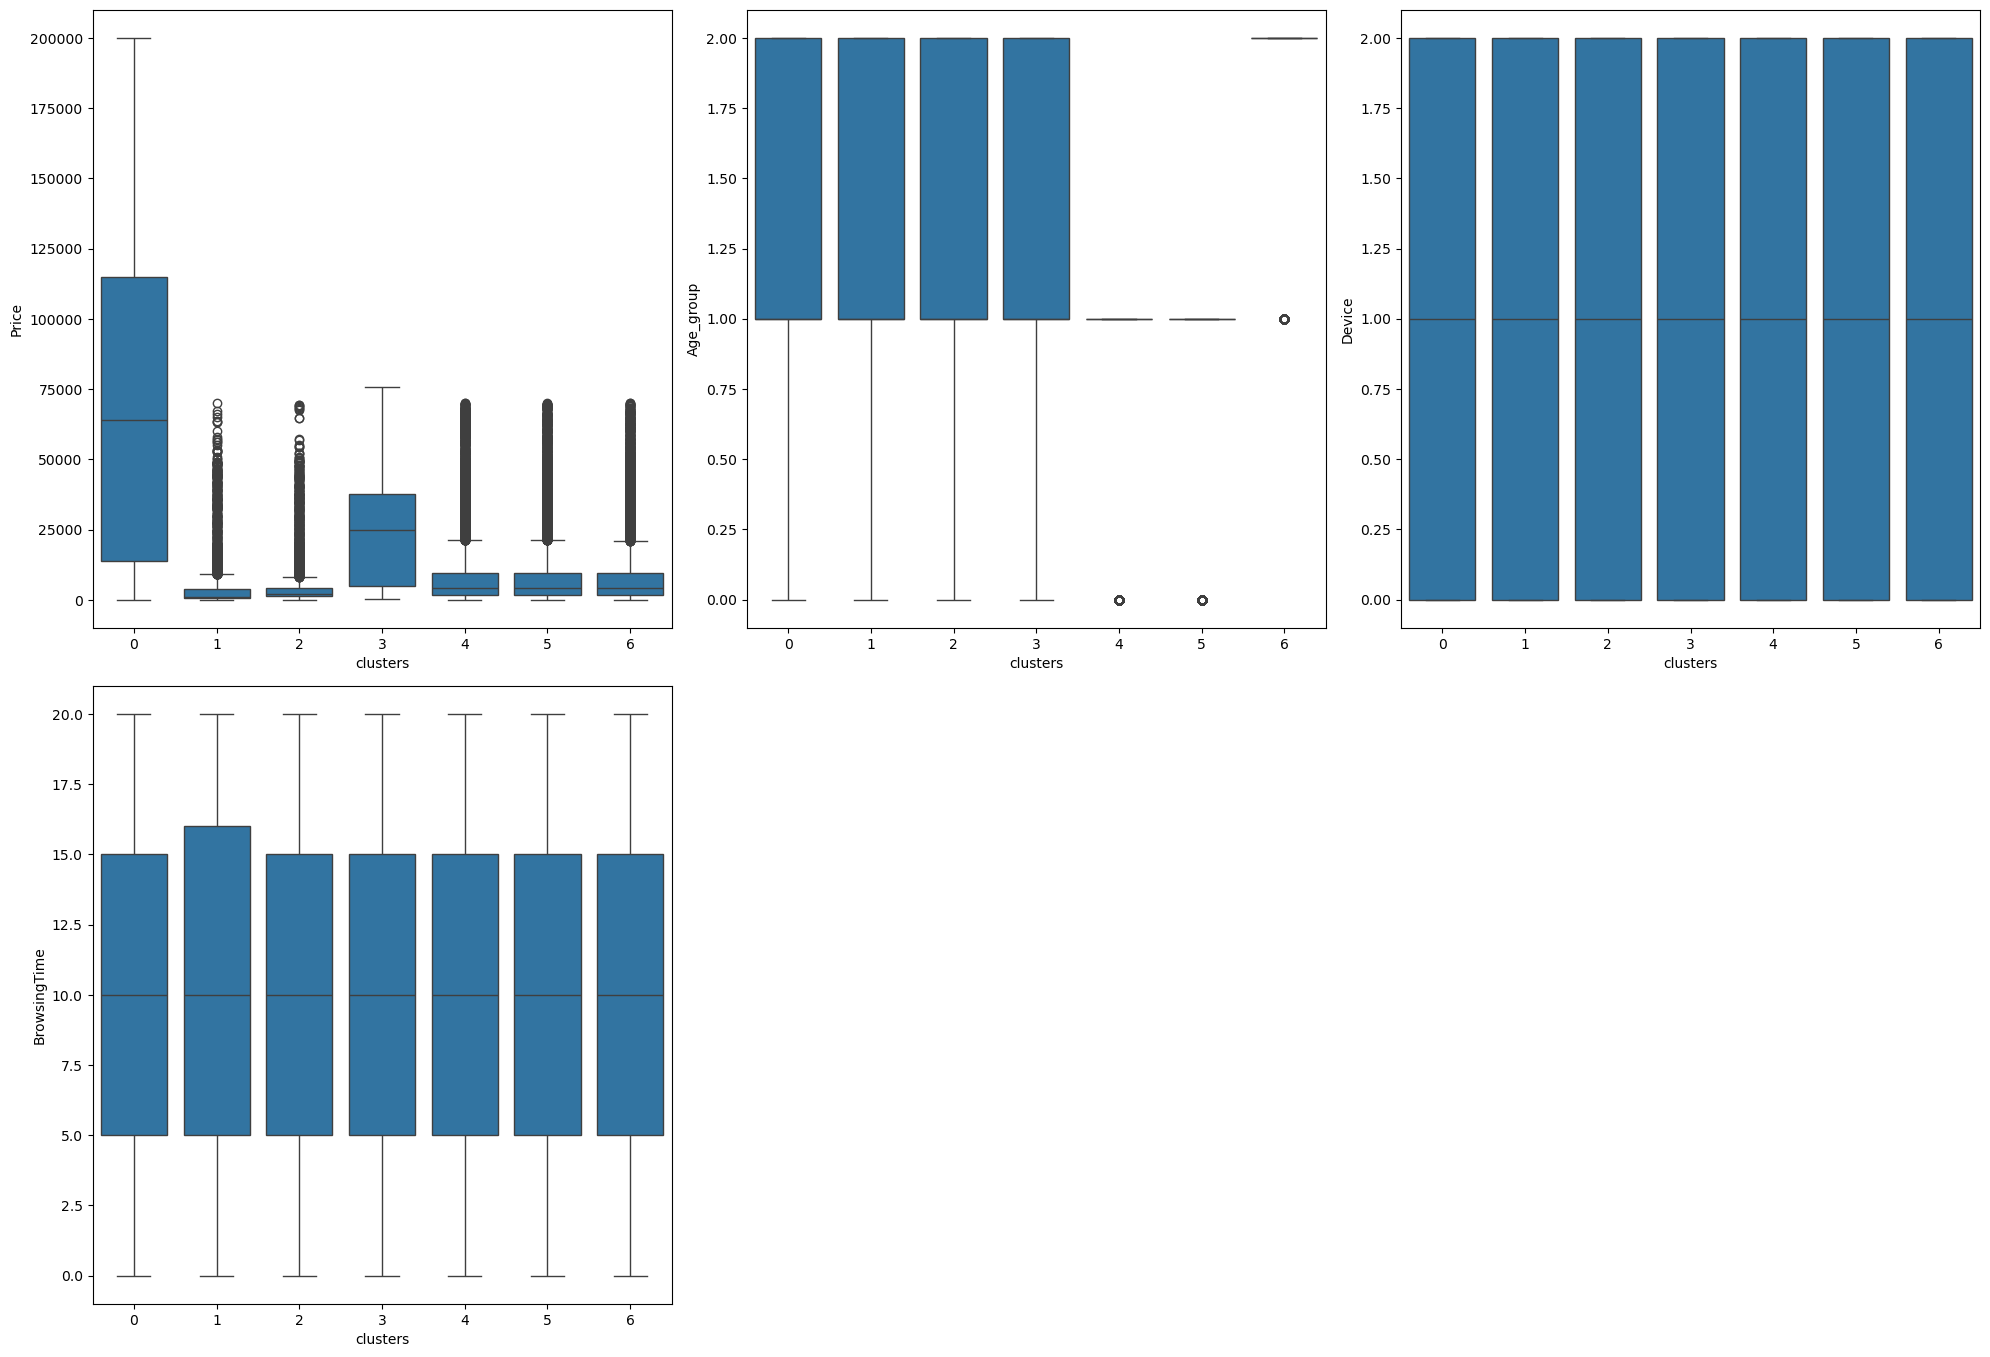

In [259]:
plt.figure(figsize=(20,20))
t=1
for i in['clusters']:
    for j in ['Price','Age_group','Device','BrowsingTime']:
        plt.subplot(3,3,t)
        sns.boxplot(df1,x=i,y=j,)
        t+=1
plt.tight_layout()        
plt.show()

# INSIGHTS 
* The Given data has a most common traits of purchase behaviour.
* Customers segmented into 3 age groups for easy understanding
* customer behaviour looks not much different when comapred with other cities
* ADULT Age group customers who range between 25-55 hold a majority of time spent on Browsing and purchase History.
* Out of 7 clusters formerd 4,5,6, clusters sounds promising with more data near by.



# FINDINGS

* Customer segment betwewen age of 25-55 are Posessing more purchase power
* The products are revolving around camera,gadgets,electronics,including high end lenses,accessories
* Time spending customers buy lower
* Where else customer with low browsing time tend to  spend high on products
* Cities location play a vital role in purchase power
  